In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import platform 
import random
import statistics

from pathlib import Path
plt.rcParams.update({'figure.max_open_warning': 0})

In [3]:
without_failure = ["Scenario_0", 
                   "Scenario_2_monitor_node_1_preamp_lpth_3-2_1", 
                   "Scenario_3_monitor_node_1_preamp_lpth_3-1_1", 
                   "Scenario_3_monitor_node_1_preamp_lpth_3-2_1"]

filtering_failure = ["Scenario_6_monitor_node_1_preamp_lpth_3-2_1",
                     "Scenario_7_monitor_node_1_preamp_lpth_2_1",
                     "Scenario_7_monitor_node_1_preamp_lpth_3-1_1", 
                     "Scenario_7_monitor_node_1_preamp_lpth_3-2_1",
                     "Scenario_8_monitor_node_1_preamp_lpth_3-1_1", 
                     "Scenario_8_monitor_node_1_preamp_lpth_3-2_1",
                     "Scenario_8_monitor_node_1_preamp_lpth_2_1"]

def norm_list(list_to_norm):
    return ((list_to_norm-min(list_to_norm))/(max(list_to_norm)/min(list_to_norm)))

def plot_scenario(file_name):
# Input: - file_name: name of the raw data file with OSNR values to be plotted
# Output: - plots of OSNR; figure should be saved into a subfolder ("Figures")

    scenario=file_name[9]
    lightpath=file_name.replace("Scenario_"+scenario+"_monitor_node_1_preamp_lpth_","").replace(".dat","")
    print('Plotting OSNR for scenario {}, lightpath {}'.format(scenario, lightpath))
    fig_folder = 'Figures' 
    
    data_raw = pd.read_csv(file_path + file_name.split("_monitor")[0] + '/' + file_name, skiprows = 5)
    
    print('Number of OSNR samples before: ' + str(len(data_raw)))
    
    # Drop duplicated rows with same DATE feature
    data_raw = data_raw.drop_duplicates(subset=[data_raw.columns.values[0]])

    # Keep only the last column
    OSNR_list = data_raw.iloc[:, -1].to_numpy(dtype='float')
    
    # Create a normalized version
    OSNR_list_norm=norm_list(OSNR_list)

    num_samples = len(OSNR_list)
    print('Number of OSNR samples: ' + str(num_samples))

    fig, axs = plt.subplots(1, 2, figsize=(15,8))
    
    global without_failure
    global filtering_failure
    
    if any(s in path.name for s in without_failure):
        # No Failure
        color = (0, 143/255, 122/255)
        fig_folder = fig_folder + '/Without_Failure'
    elif any(s in path.name for s in filtering_failure):
        # Filtering
        color = (255/255, 199/255, 95/255)
        fig_folder = fig_folder + '/Filtering_Failure'
    else:
        # Attenuation
        color = (195/255, 74/255, 54/255)
        fig_folder = fig_folder + '/Attenuation_Failure'
    
    if not os.path.exists(fig_folder):
        os.makedirs(fig_folder)
        
    axs[0].plot(OSNR_list, label = lightpath, color = color)
    axs[0].set_title('Raw Scenario: {}, Lightpath: {}'.format(scenario, lightpath))
    axs[0].set_xlabel('Samples, s')
    axs[0].set_ylabel('OSNR, dB')
    axs[0].grid()
    
    axs[1].plot(OSNR_list_norm, label = lightpath, color = color)
    axs[1].set_title('Norm. Scenario: {}, Lightpath: {}'.format(scenario, lightpath))
    axs[1].set_xlabel('Samples, s')
    axs[1].set_ylabel('OSNR, dB')
    axs[1].grid()
    
    fig.savefig(fig_folder + '/' + file_name.replace('.dat', '_raw_norm.png'))
    

Scenario_0_monitor_node_1_preamp_lpth_2_1.dat
Plotting OSNR for scenario 0, lightpath 2_1
Number of OSNR samples before: 21600
Number of OSNR samples: 21600

Scenario_0_monitor_node_1_preamp_lpth_3-1_1.dat
Plotting OSNR for scenario 0, lightpath 3-1_1
Number of OSNR samples before: 21600
Number of OSNR samples: 21600

Scenario_0_monitor_node_1_preamp_lpth_3-2_1.dat
Plotting OSNR for scenario 0, lightpath 3-2_1
Number of OSNR samples before: 21600
Number of OSNR samples: 21600

Scenario_1_monitor_node_1_preamp_lpth_2_1.dat
Plotting OSNR for scenario 1, lightpath 2_1
Number of OSNR samples before: 21600
Number of OSNR samples: 21600

Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat
Plotting OSNR for scenario 1, lightpath 3-1_1
Number of OSNR samples before: 21600
Number of OSNR samples: 21600

Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat
Plotting OSNR for scenario 1, lightpath 3-2_1
Number of OSNR samples before: 21600
Number of OSNR samples: 21600

Scenario_2_monitor_node_1_preamp_lpt

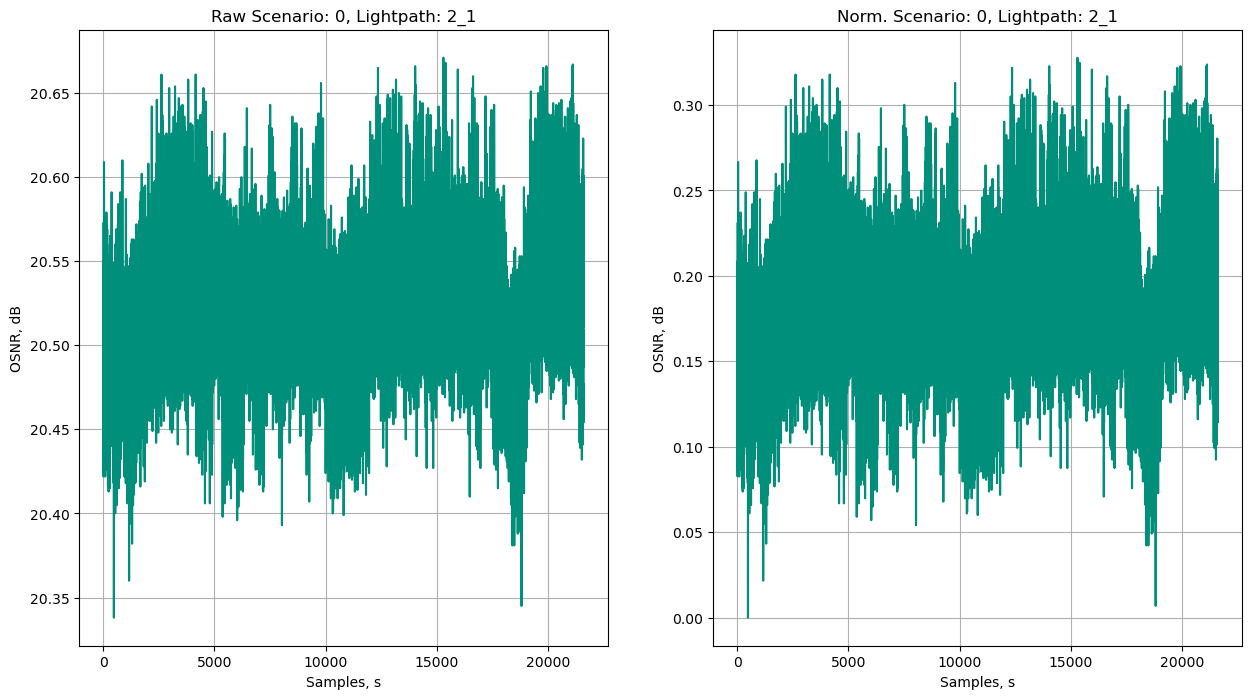

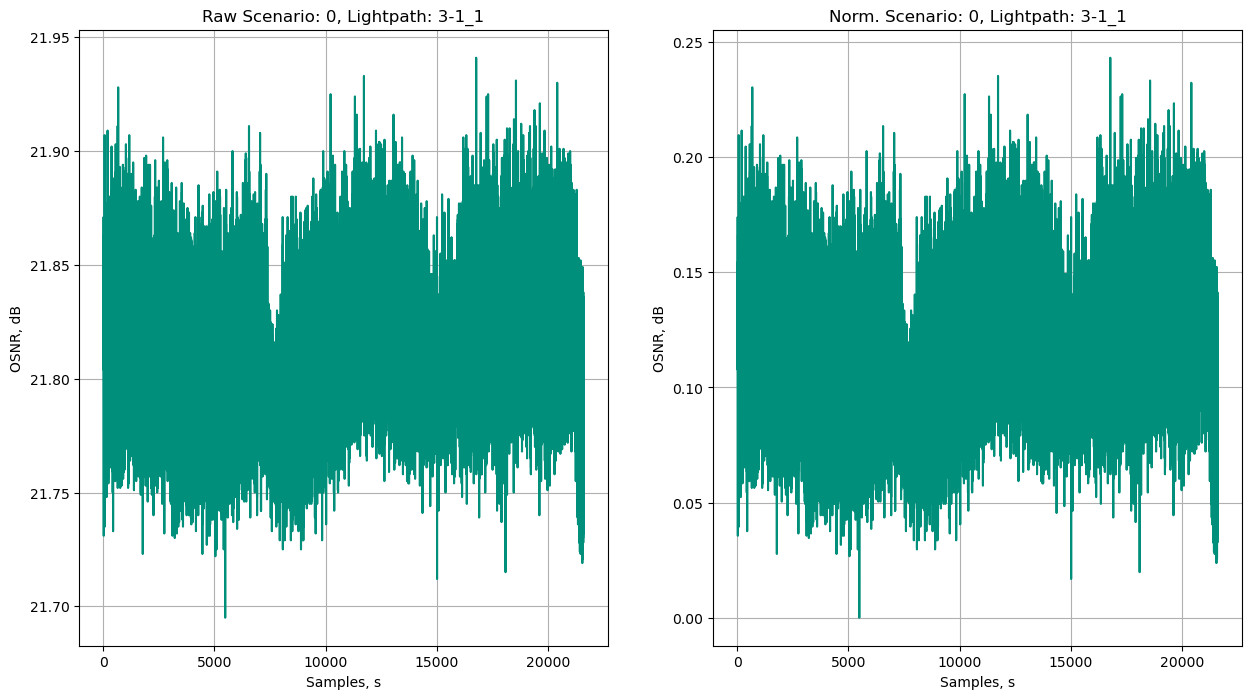

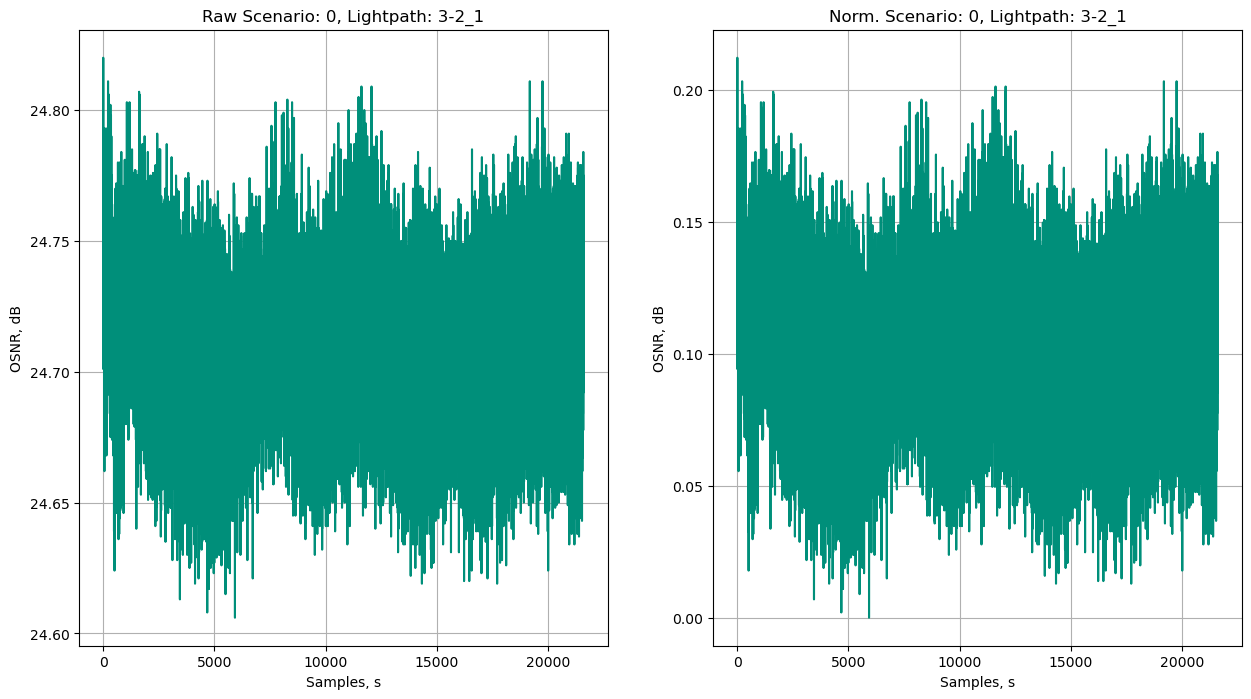

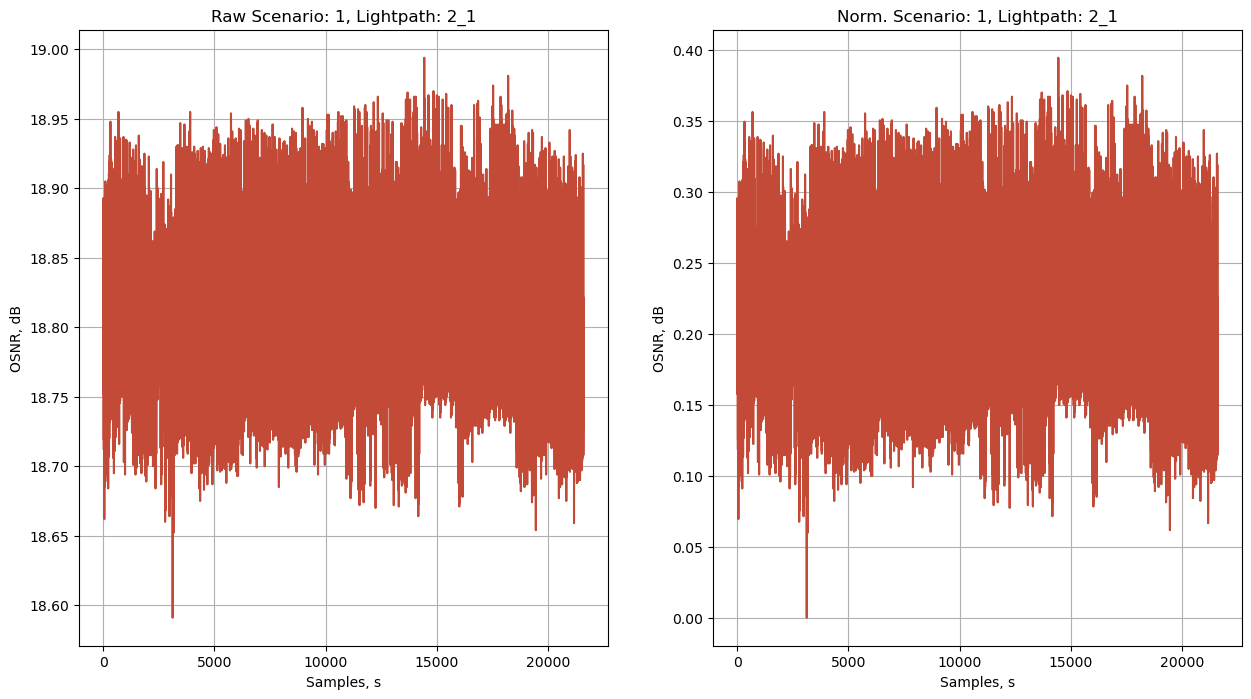

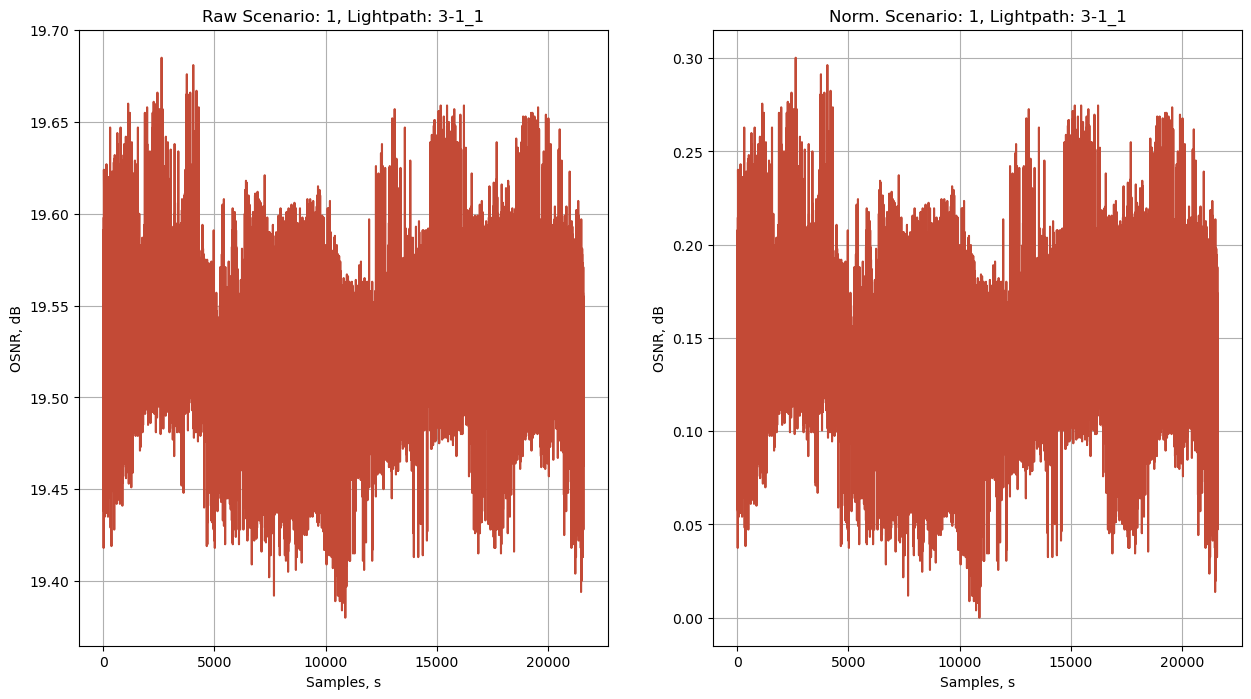

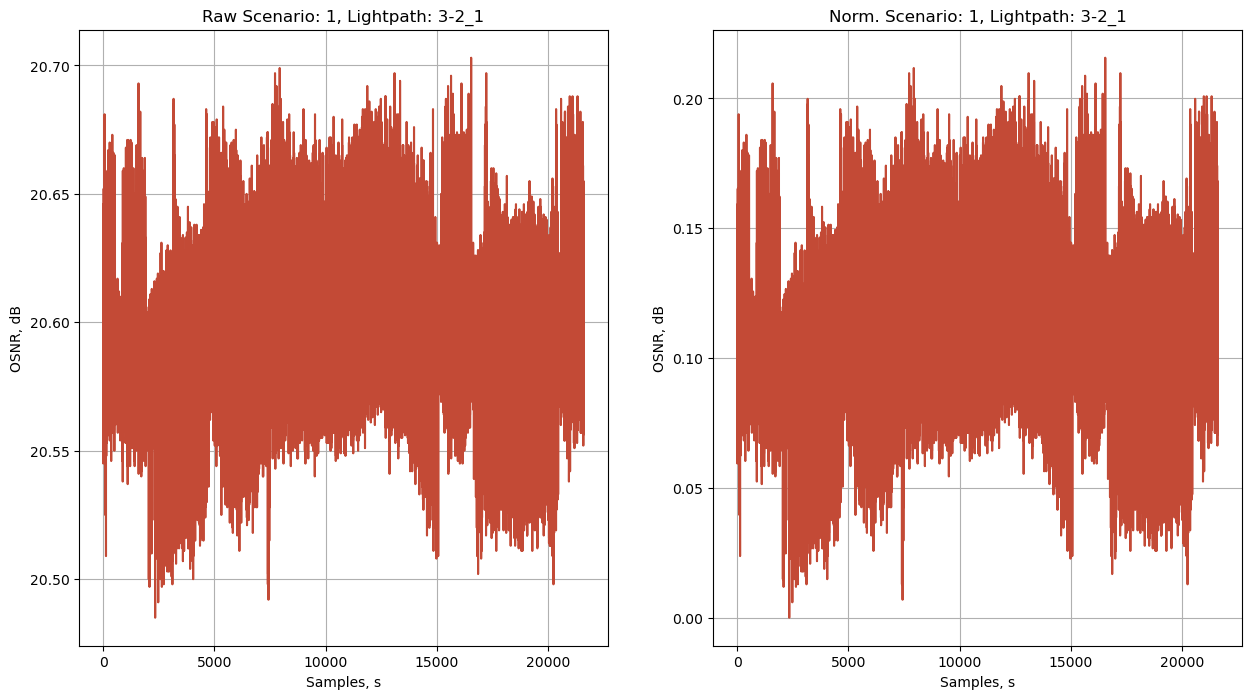

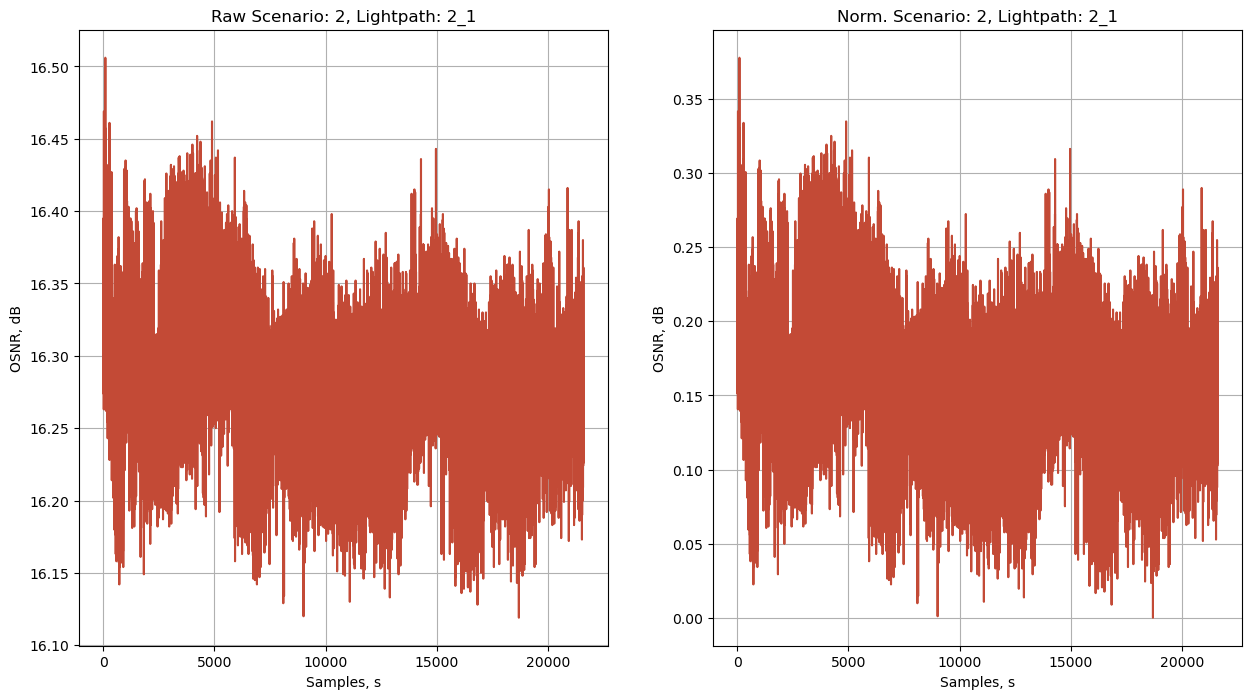

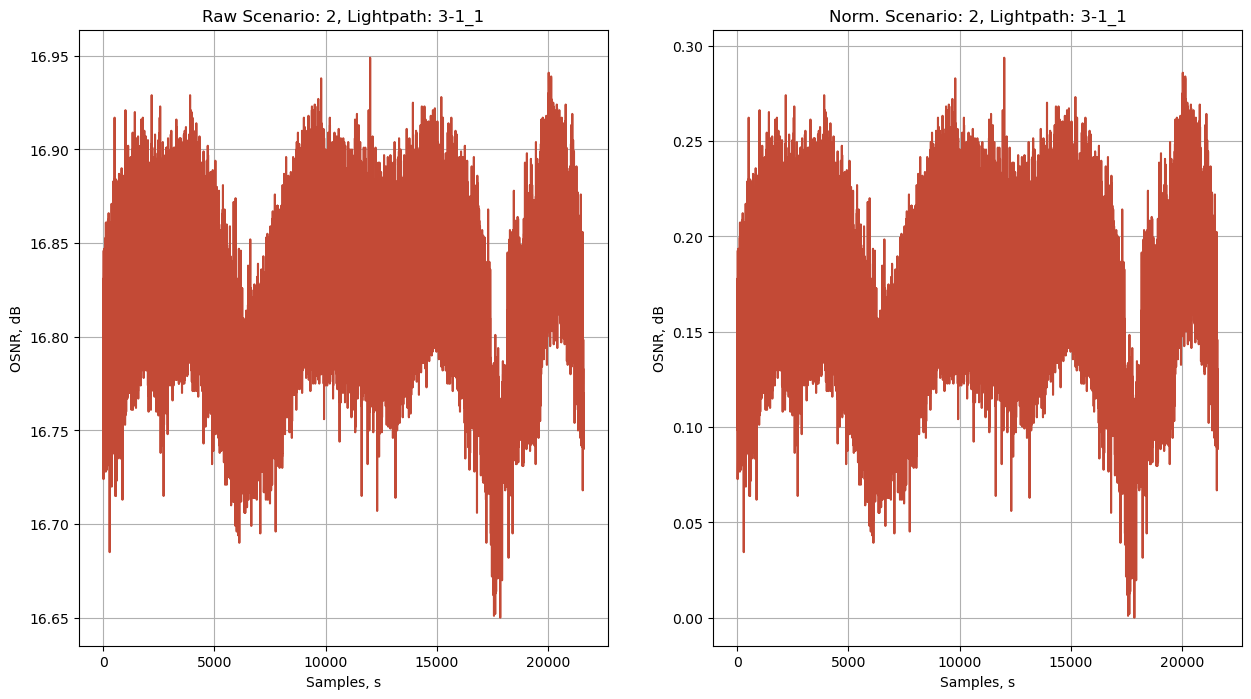

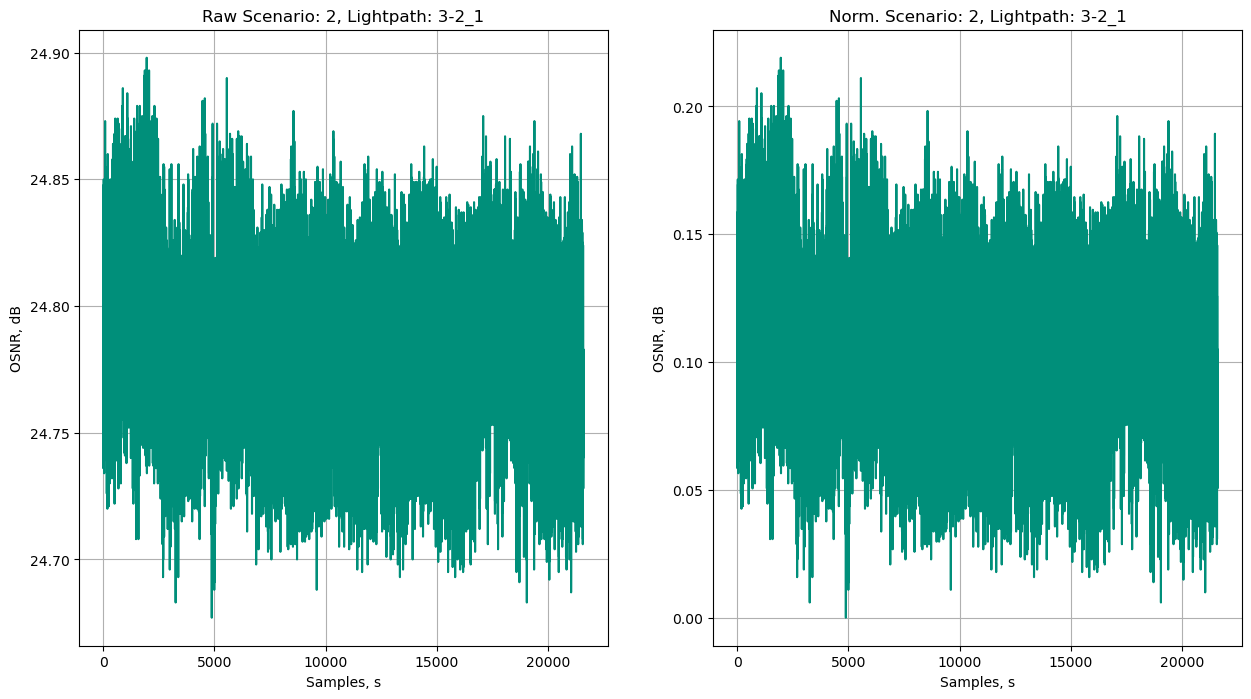

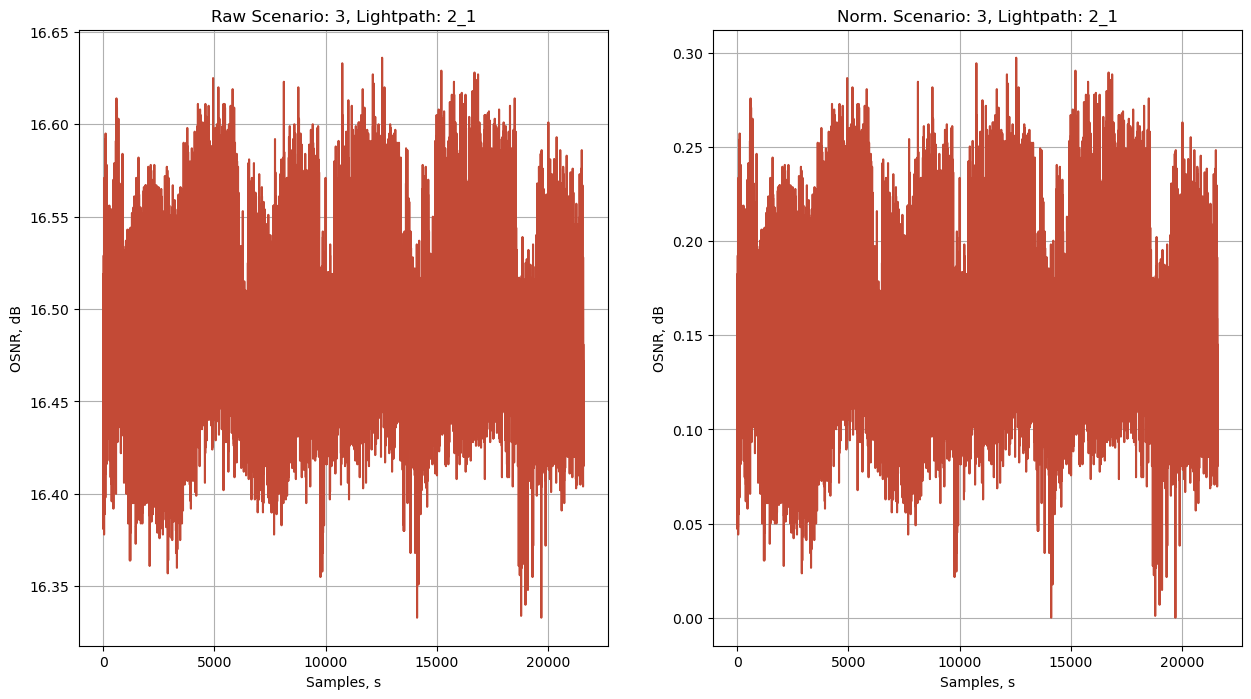

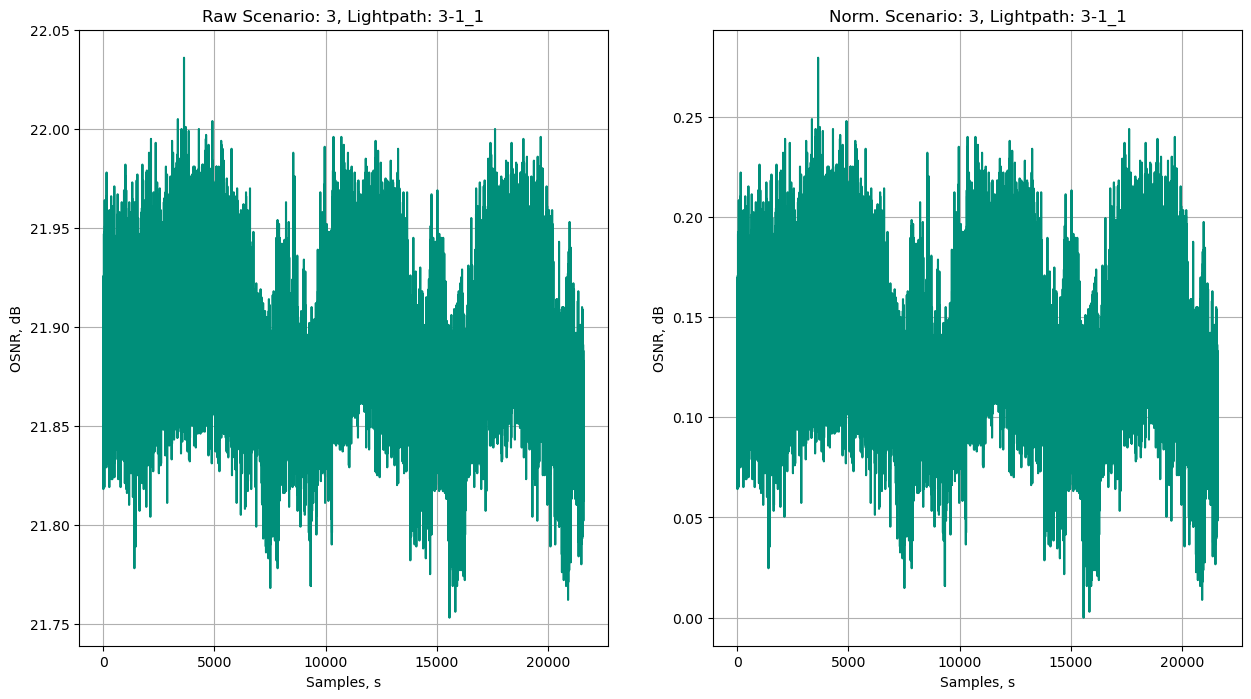

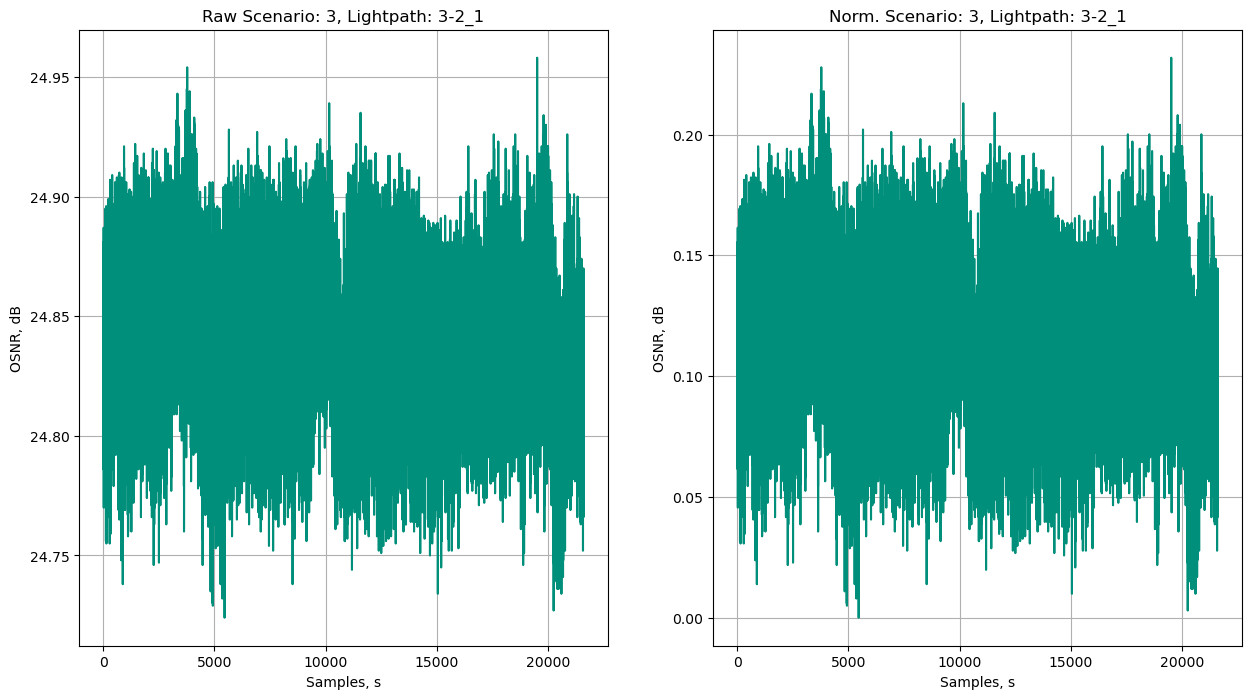

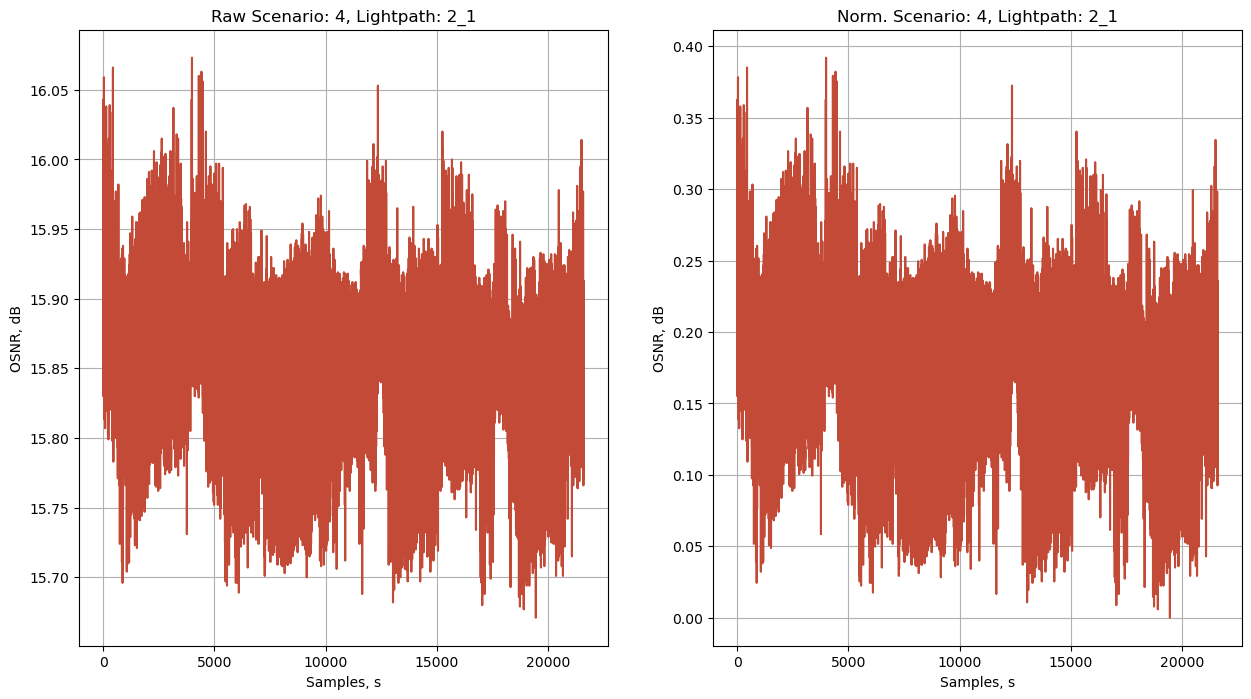

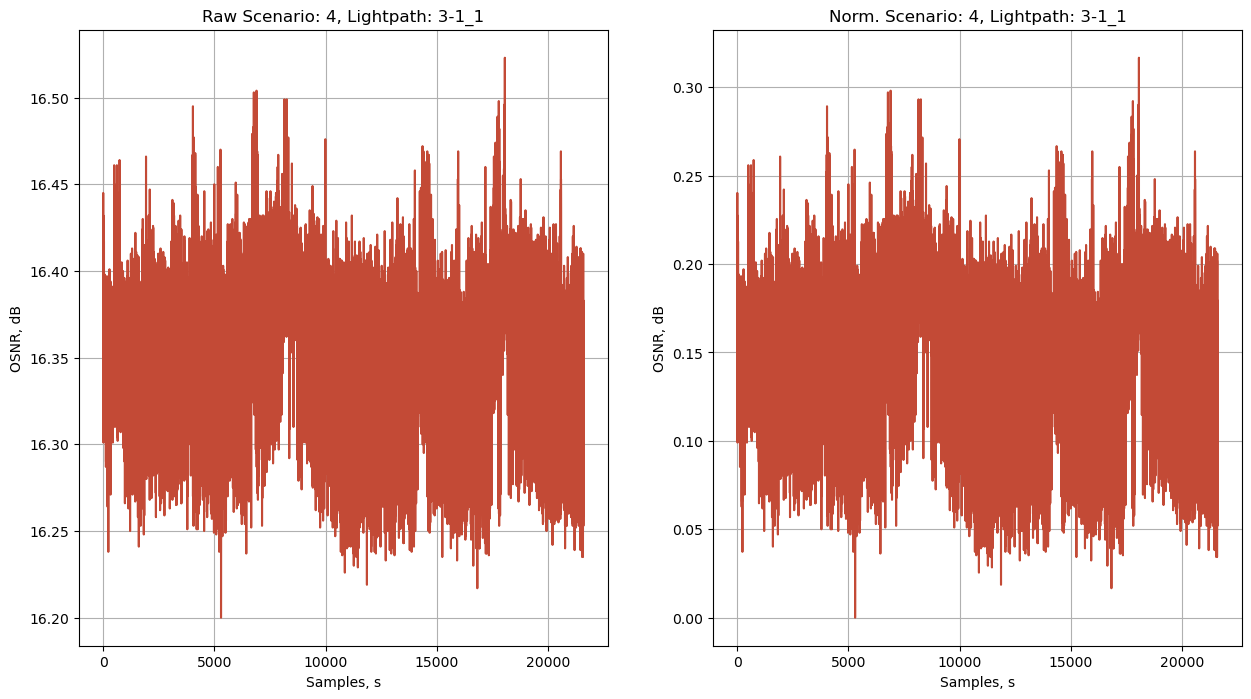

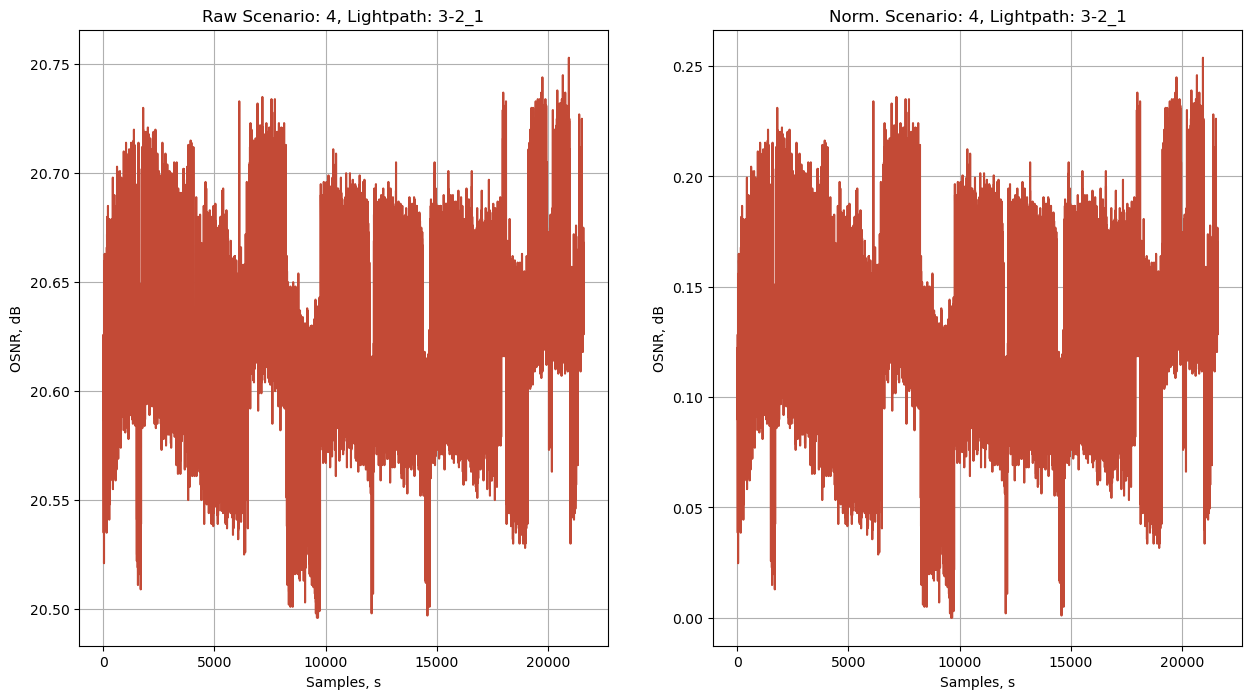

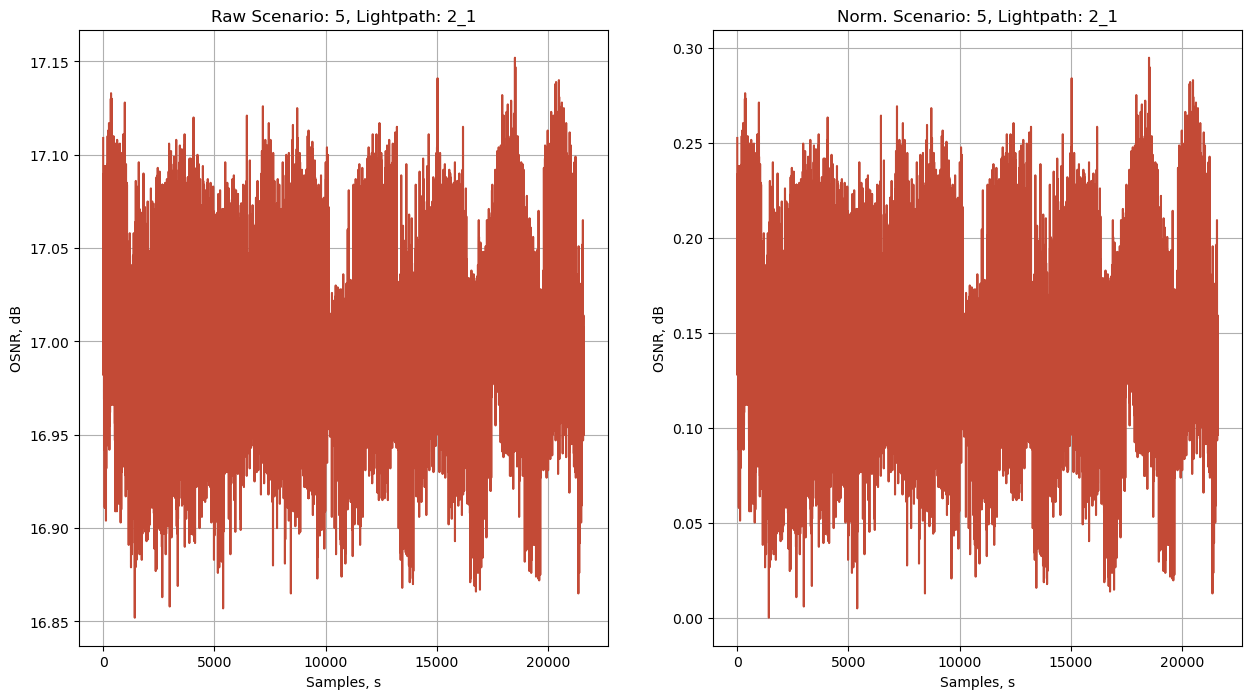

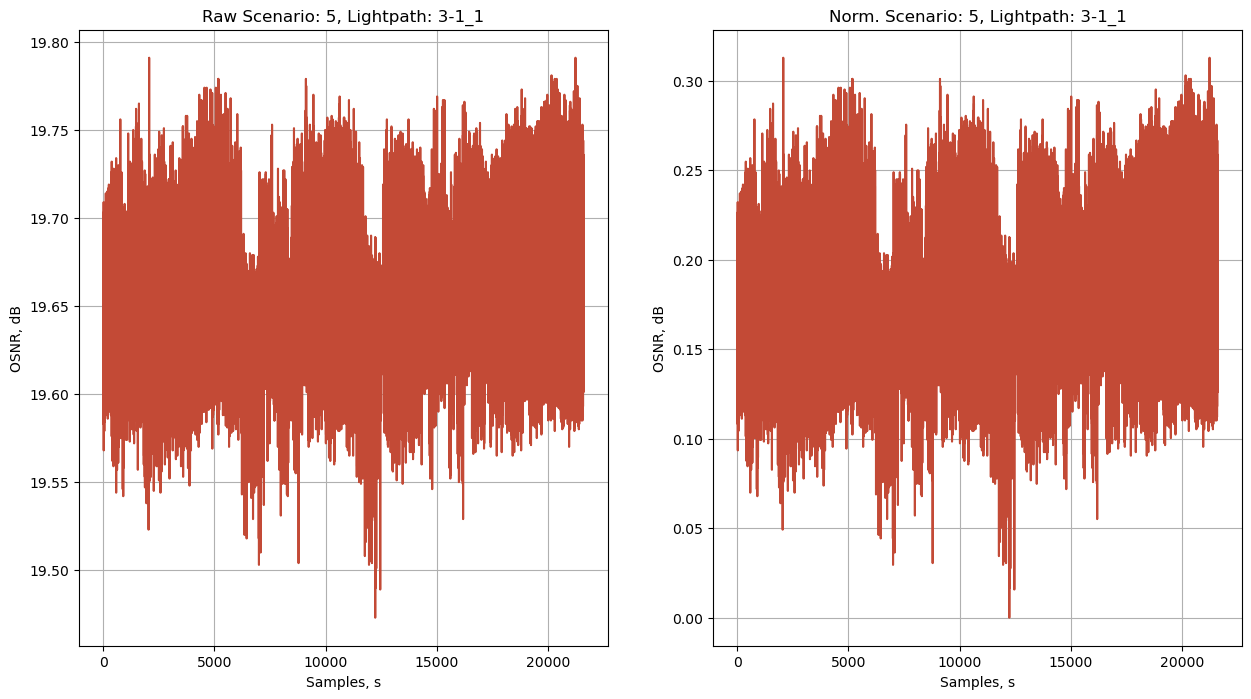

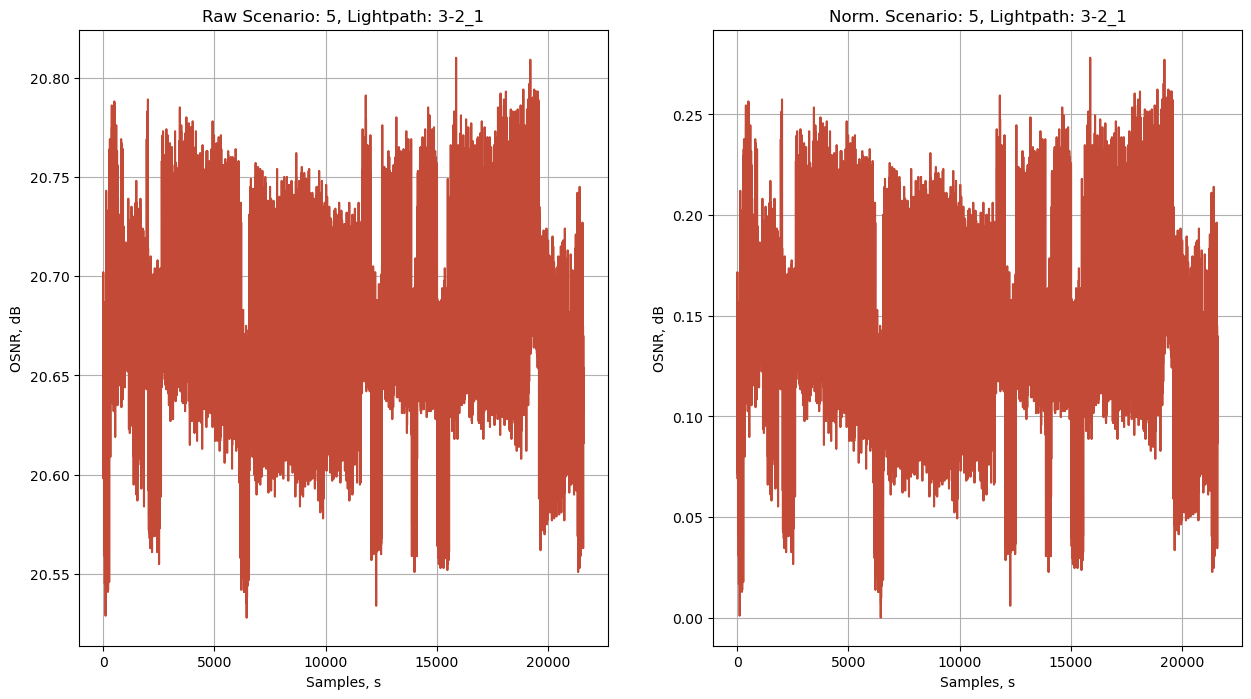

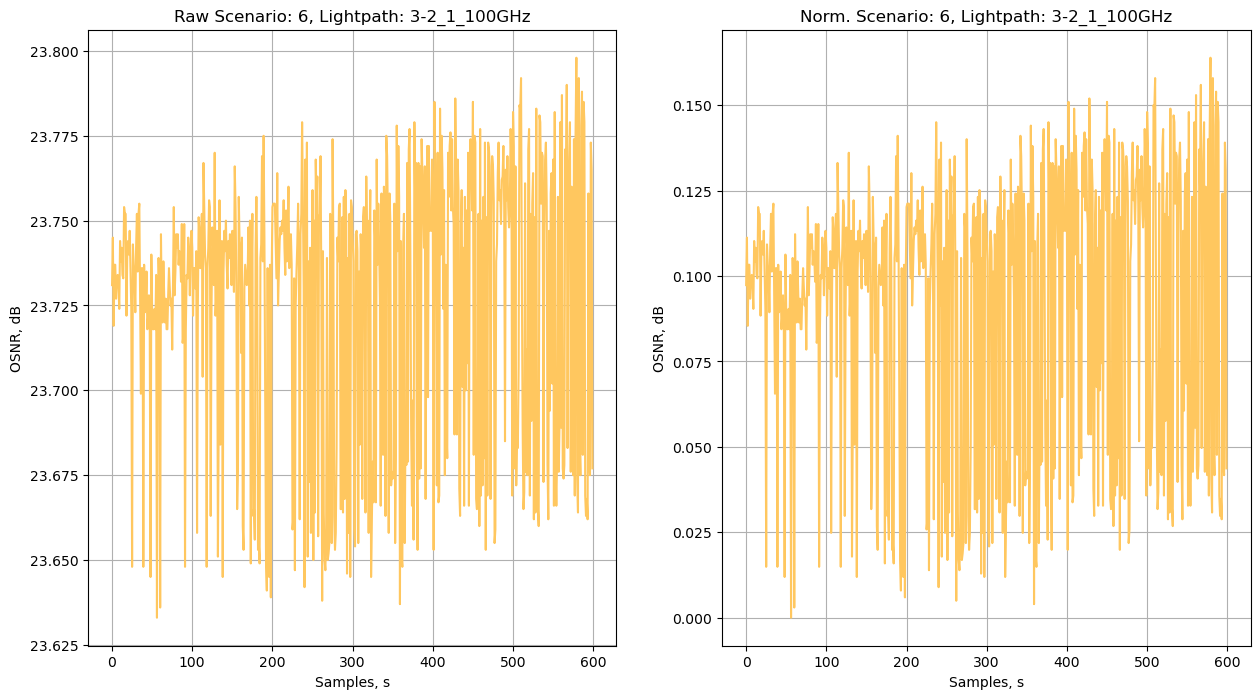

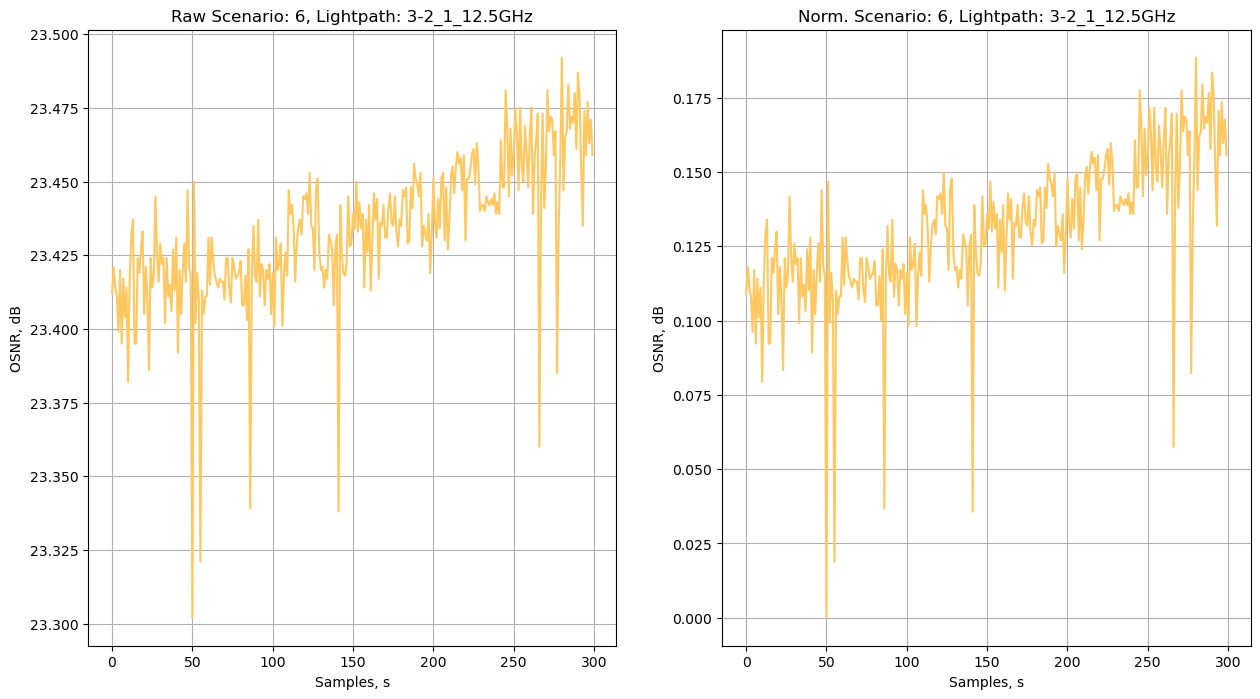

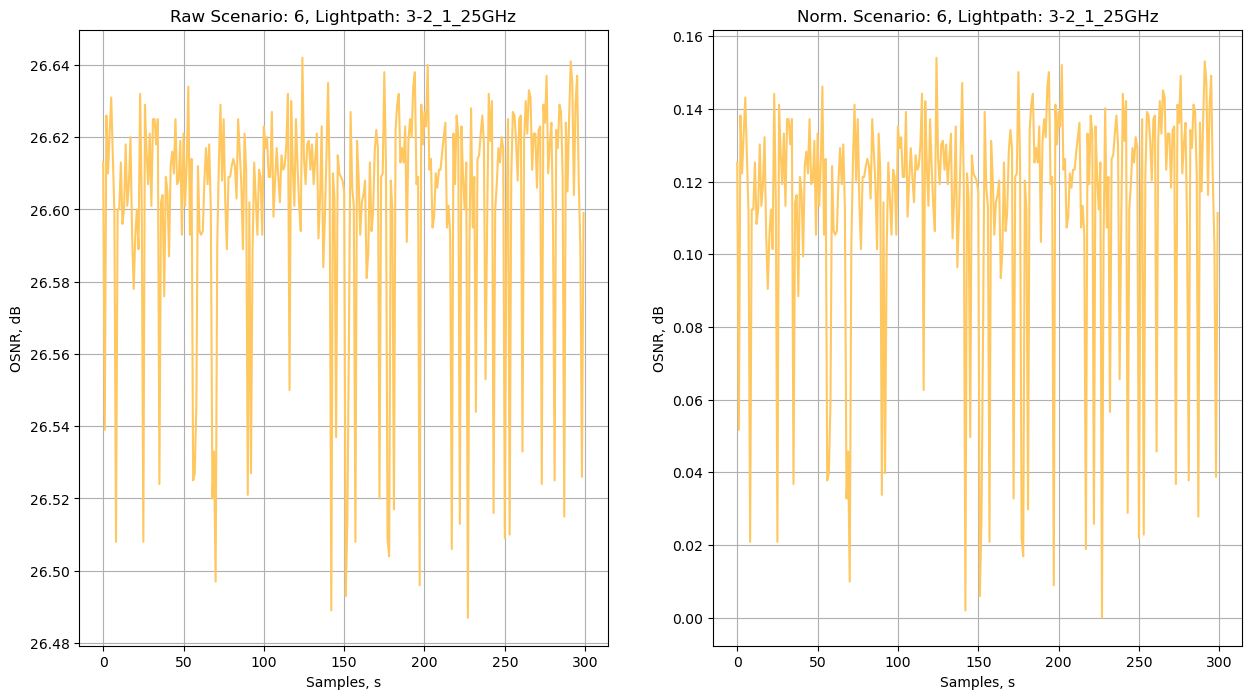

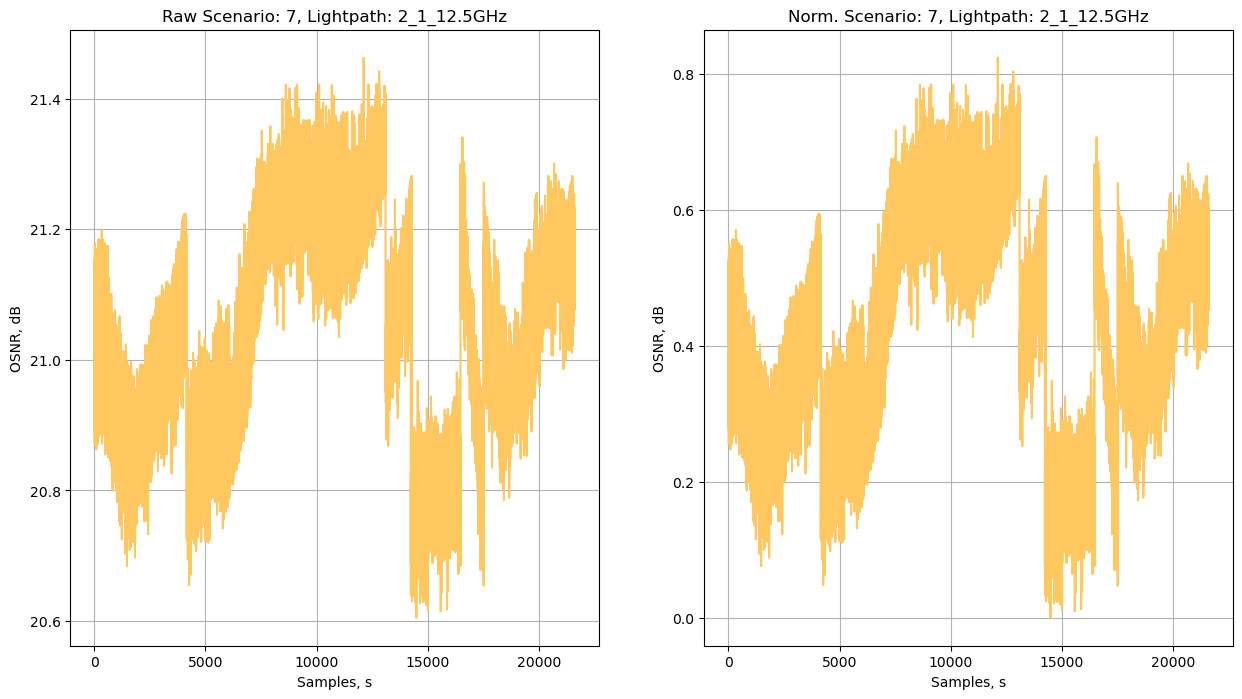

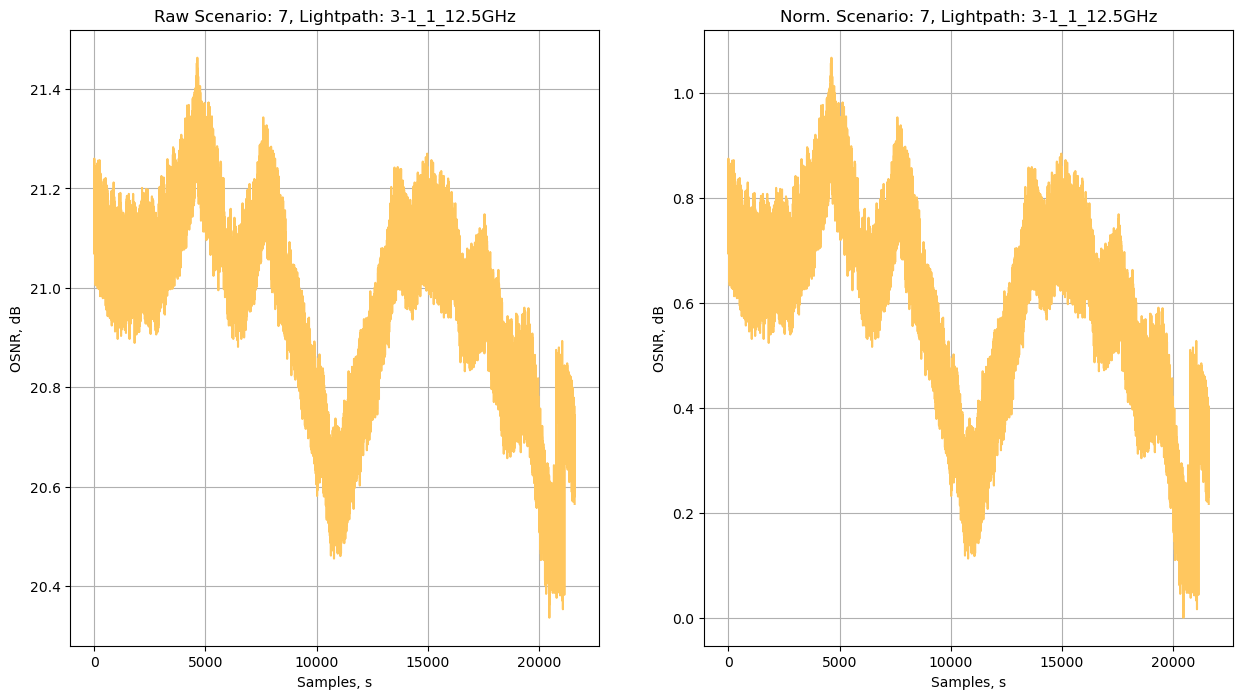

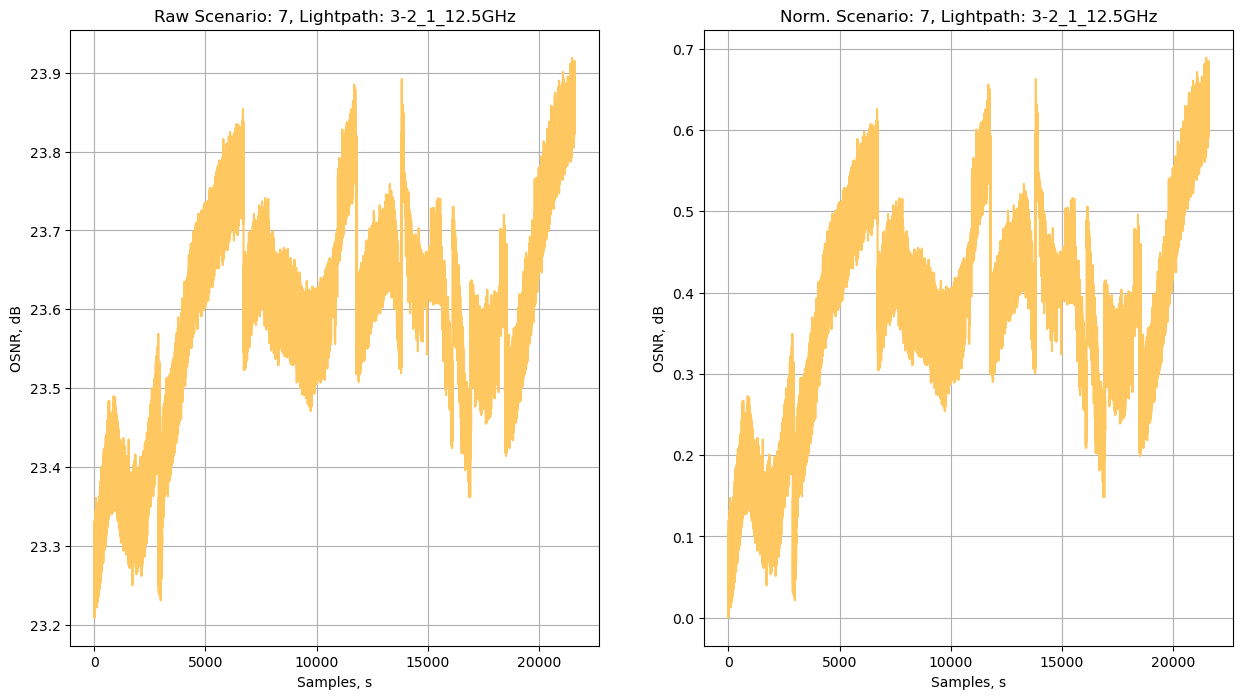

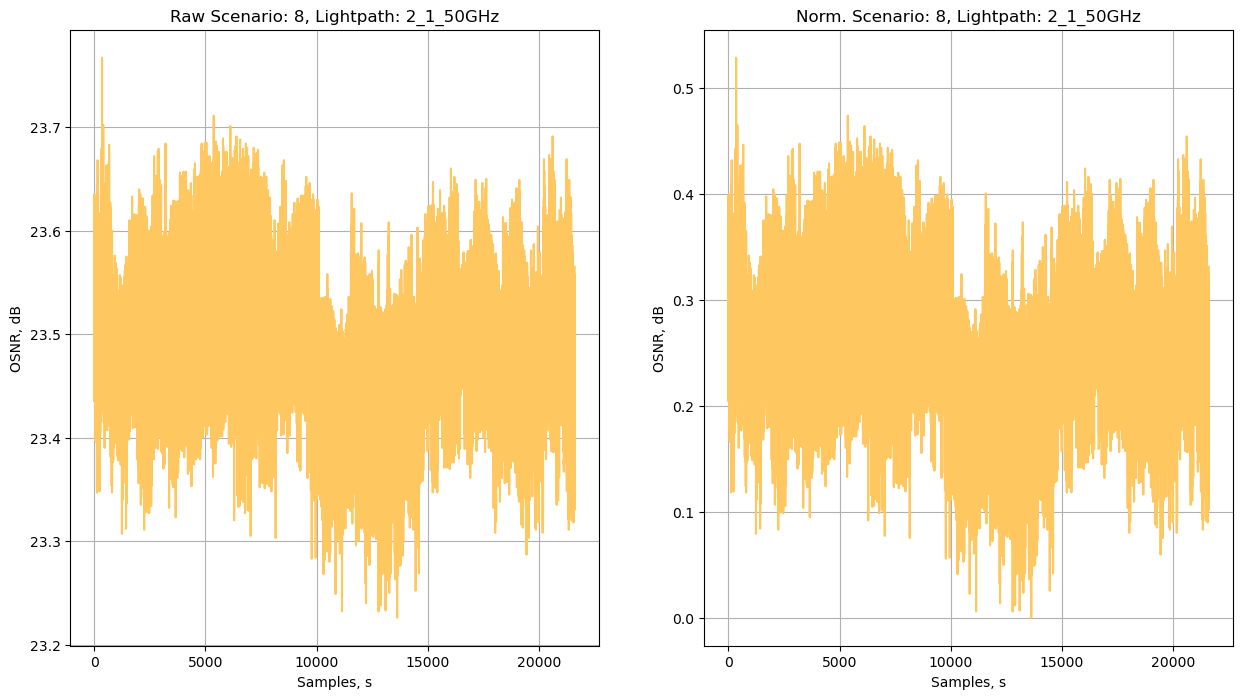

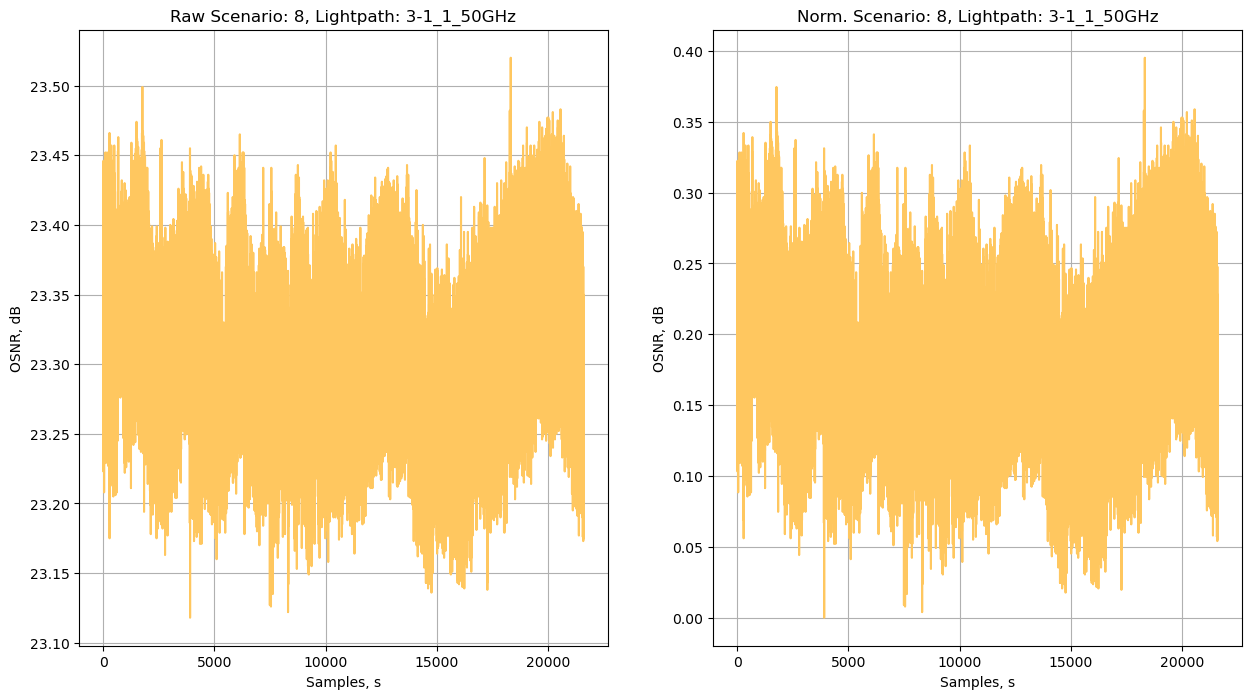

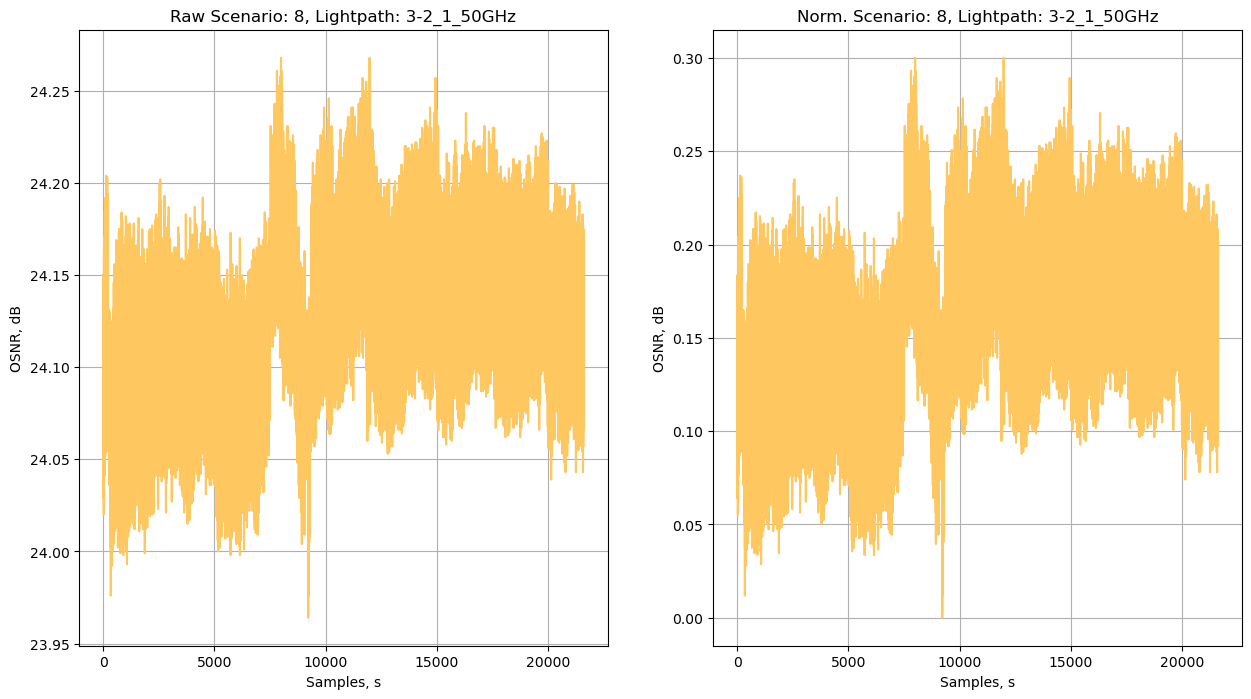

In [7]:
###########################################################################################
###### Plot the OSNR figures for all scenarios
###########################################################################################

# Switch between Local and Colab execution
if platform.system() == 'Linux':
    from google.colab import drive
    drive.mount('/content/drive')
    file_path = '/content/drive/MyDrive/Colab Notebooks/NDAL_data/'
else:
    file_path = 'NDAL_data/'

for path in Path(file_path).rglob('*_preamp_lpth_*.dat'):
    print(path.name)
    plot_scenario(path.name)
    print()


In [11]:
# Create window dataset for normalized and raw data
def create_window_dataset(filename, w_len=100, window_spacing=1, base_feature_folder='Features', norm=False, 
                          ACTION_PROB=0.05, sampling=1, noise_interval=0, noise_length=0, noise_mean=0):
    print('Creating windows dataset from file {} (window length={}; spacing={}; sampling={}; noise_interval={}; noise_length={}; noise_mean={})'.format(filename,
    w_len, window_spacing, sampling, noise_interval, noise_length, noise_mean))
    
    if norm:
        feature_folder=base_feature_folder+'_norm'
    elif any(i.isdigit() for i in base_feature_folder):
        feature_folder=base_feature_folder
    else:
        feature_folder=base_feature_folder+'_raw'
        
    splitted_filename = filename.split('_')
    data_raw = pd.read_csv(file_path + splitted_filename[0] + '_' + splitted_filename[1] + '/' + filename, skiprows = 5)
    data_raw = data_raw.drop_duplicates(subset=[data_raw.columns.values[0]]) #F: remove duplicates with same DATE field
    
    OSNR_list = data_raw.iloc[:, -1].to_numpy(dtype='float') # keep only the last column
    
    # Noise part
    if noise_interval != 0 and noise_length != 0 and noise_mean != 0:
        # Mean
        mu = noise_mean
        # standard deviation
        sigma = 1 
        # mean and standard deviation
        noise_array = np.random.normal(mu, sigma, noise_length)
        
        counter = 0
        placing = False
        for i, element in enumerate(OSNR_list):
            if counter == noise_length:
                placing = False
                counter = 0
            if (i+1)%(noise_interval+noise_length) == 0:
                placing = True
            if placing:
                OSNR_list[i] += noise_array[counter]
                counter += 1
        
        
    # Slicing -> OSNR_list[ Initial : End : IndexJump]
    if sampling != 1:
        OSNR_list = OSNR_list[::sampling]
        
    num_samples = len(OSNR_list) #F: counts the number of OSNR samples in the file
        
    counter = 0
    if "mean" in base_feature_folder:
        feature_folder=feature_folder+'_'+str(ACTION_PROB).replace(".", "_")
        mean = statistics.mean(OSNR_list)
        for i in range(num_samples):
            if random.random() <= ACTION_PROB:
                OSNR_list[i] = mean
                counter = counter + 1
        print(f'Injected {counter}/{num_samples} spacial elements in the list.')
    elif "median" in base_feature_folder:
        feature_folder=feature_folder+'_'+str(ACTION_PROB).replace(".", "_")
        median = statistics.median(OSNR_list)
        for i in range(num_samples):
            if random.random() <= ACTION_PROB:
                OSNR_list[i] = median
                counter = counter + 1
        print(f'Injected {counter}/{num_samples} spacial elements in the list.')
    elif "mode" in base_feature_folder:
        feature_folder=feature_folder+'_'+str(ACTION_PROB).replace(".", "_")
        mode = statistics.mode(OSNR_list)
        for i in range(num_samples):
            if random.random() <= ACTION_PROB:
                OSNR_list[i] = mode
                counter = counter + 1
        print(f'Injected {counter}/{num_samples} spacial elements in the list.')
    elif "previous" in base_feature_folder:
        feature_folder=feature_folder+'_'+str(ACTION_PROB).replace(".", "_")
        for i in range(num_samples):
            if random.random() <= ACTION_PROB and i != 0:
                OSNR_list[i] = OSNR_list[i-1]
                counter = counter + 1
        print(f'Injected {counter}/{num_samples} spacial elements in the list.')
    
    if not os.path.exists(feature_folder):
        os.makedirs(feature_folder)
        
    if norm:
        OSNR_list = norm_list(OSNR_list)
    
    #F: write heading line on the windows dataset file (we have 6 features in total)
    head_line=[i for i in range(6)] #F: initialization
    
    head_line[0]='mean'
    head_line[1]='RMS' #Root Mean Square
    head_line[2]='ptp'
    head_line[3]='std'
    head_line[4]='max'
    head_line[5]='min'
    
    full_filename = (feature_folder + '/' + filename.rstrip('.dat') + '_nm' + str(noise_mean) + '_ni' + str(noise_interval) + '_nl' + str(noise_length) 
                     + '_sa' + str(sampling) + '_sp' + str(window_spacing) + '_w' + str(w_len) + '.dat') 
    
    # Write the only the first line
    with open(full_filename, 'w') as feature_file:
            feature_file.write(','.join(head_line))
            feature_file.write('\n')
    
    # Write features for each OSNR window (one row = one window)    
    counter = 0 #F: represents the first OSNR sample of the current window being inserted in the features dataset
    last_window = False
    
    while last_window==False:
        #print('Creating window starting with sample no. {}.'.format(counter))

        # We create the window with OSNR_list indexed from "counter" to "counter + w_len"
        #F: note that last index (counter+w_len) is excluded
        OSNR_window = OSNR_list[counter : counter + w_len] #F: note that last index (counter+w_len) is excluded
        
        feature_vect = [] #F: this list stores the features for the current OSNR window
        feature_vect.append(np.mean(OSNR_window))
        feature_vect.append(np.sqrt(np.mean(OSNR_window**2))) #F: RMS
        feature_vect.append(np.ptp(OSNR_window))
        feature_vect.append(np.std(OSNR_window))
        feature_vect.append(max(OSNR_window))
        feature_vect.append(min(OSNR_window))

        # Iteration in the same line: for each "val" in "feature_vect" round "val" with 3 decimals
        str_feature_vect = [str(round(val, 3)) for val in feature_vect]
        
        with open(full_filename, 'a') as feature_file:
            feature_file.write(','.join(str_feature_vect))
            feature_file.write('\n')
            
        counter += window_spacing
        if counter + w_len > num_samples:
            print('Last window reached. Current window (with length {}) would start with ID {}, but last OSNR ID is {}\n'.format(w_len,counter,num_samples-1))
            last_window=True

In [18]:
##########################################################################################################
###### We use the function create_window_dataset() to generate features files for all scenarios
##########################################################################################################

heatmap_range = [3, 5, 10, 30, 75, 150, 300, 750, 1200, 1800, 3600]
for path in Path(file_path).rglob('*_preamp_lpth_*.dat'):
    if any(s in path.name for s in without_failure):
        continue
    for windowlength in heatmap_range:
        for spacing in heatmap_range:
            create_window_dataset(path.name, windowlength, spacing, 'Features', False)
            create_window_dataset(path.name, windowlength, spacing, 'Features', True)

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=3; spacing=3)
Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=3; spacing=3)
Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=3; spacing=5)
Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=3; spacing=5)
Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=3; spacing=10)
Last window reached. Curr

Last window reached. Current window (with length 5) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=5; spacing=1200)
Last window reached. Current window (with length 5) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=5; spacing=1800)
Last window reached. Current window (with length 5) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=5; spacing=1800)
Last window reached. Current window (with length 5) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=5; spacing=3600)
Last window reached. Current window (with length 5) would start with ID 21600, but last OSNR ID is 21599

Creating windows d

Last window reached. Current window (with length 30) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=30; spacing=150)
Last window reached. Current window (with length 30) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=30; spacing=300)
Last window reached. Current window (with length 30) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=30; spacing=300)
Last window reached. Current window (with length 30) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=30; spacing=750)
Last window reached. Current window (with length 30) would start with ID 21750, but last OSNR ID is 21599

Creating wind

Last window reached. Current window (with length 150) would start with ID 21460, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=150; spacing=10)
Last window reached. Current window (with length 150) would start with ID 21460, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=150; spacing=30)
Last window reached. Current window (with length 150) would start with ID 21480, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=150; spacing=30)
Last window reached. Current window (with length 150) would start with ID 21480, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=150; spacing=75)
Last window reached. Current window (with length 150) would start with ID 21525, but last OSNR ID is 21599

Creating

Last window reached. Current window (with length 300) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=300; spacing=3600)
Last window reached. Current window (with length 300) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=300; spacing=3600)
Last window reached. Current window (with length 300) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=750; spacing=3)
Last window reached. Current window (with length 750) would start with ID 20853, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=750; spacing=3)
Last window reached. Current window (with length 750) would start with ID 20853, but last OSNR ID is 21599

Creati

Last window reached. Current window (with length 1200) would start with ID 20700, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=1200; spacing=300)
Last window reached. Current window (with length 1200) would start with ID 20700, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=1200; spacing=750)
Last window reached. Current window (with length 1200) would start with ID 21000, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=1200; spacing=750)
Last window reached. Current window (with length 1200) would start with ID 21000, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=1200; spacing=1200)
Last window reached. Current window (with length 1200) would start with ID 21600, but last OSNR ID is 2

Last window reached. Current window (with length 3600) would start with ID 18010, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=3600; spacing=30)
Last window reached. Current window (with length 3600) would start with ID 18030, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=3600; spacing=30)
Last window reached. Current window (with length 3600) would start with ID 18030, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=3600; spacing=75)
Last window reached. Current window (with length 3600) would start with ID 18075, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=3600; spacing=75)
Last window reached. Current window (with length 3600) would start with ID 18075, but last OSNR ID is 21599


Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=5; spacing=3)
Last window reached. Current window (with length 5) would start with ID 21597, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=5; spacing=3)
Last window reached. Current window (with length 5) would start with ID 21597, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=5; spacing=5)
Last window reached. Current window (with length 5) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=5; spacing=5)
Last window reached. Current window (with length 5) would start with ID 21600, but last OSNR ID is 21599

Creating windows datas

Last window reached. Current window (with length 10) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=1800)
Last window reached. Current window (with length 10) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=1800)
Last window reached. Current window (with length 10) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=3600)
Last window reached. Current window (with length 10) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=3600)
Last window reached. Current window (with length 10) would start with ID 21600, but last OSNR ID is 21599

C

Last window reached. Current window (with length 75) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=75; spacing=150)
Last window reached. Current window (with length 75) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=75; spacing=300)
Last window reached. Current window (with length 75) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=75; spacing=300)
Last window reached. Current window (with length 75) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=75; spacing=750)
Last window reached. Current window (with length 75) would start with ID 21750, but last OSNR ID is 21599

Creat

Last window reached. Current window (with length 300) would start with ID 21305, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=300; spacing=10)
Last window reached. Current window (with length 300) would start with ID 21310, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=300; spacing=10)
Last window reached. Current window (with length 300) would start with ID 21310, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=300; spacing=30)
Last window reached. Current window (with length 300) would start with ID 21330, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=300; spacing=30)
Last window reached. Current window (with length 300) would start with ID 21330, but last OSNR ID is 21599



Last window reached. Current window (with length 750) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=750; spacing=3600)
Last window reached. Current window (with length 750) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=750; spacing=3600)
Last window reached. Current window (with length 750) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=1200; spacing=3)
Last window reached. Current window (with length 1200) would start with ID 20403, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=1200; spacing=3)
Last window reached. Current window (with length 1200) would start with ID 20403, but last OSNR ID is 2

Last window reached. Current window (with length 1800) would start with ID 20100, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=1800; spacing=300)
Last window reached. Current window (with length 1800) would start with ID 20100, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=1800; spacing=750)
Last window reached. Current window (with length 1800) would start with ID 20250, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=1800; spacing=750)
Last window reached. Current window (with length 1800) would start with ID 20250, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=1800; spacing=1200)
Last window reached. Current window (with length 1800) would start with ID 20400, but last OSNR

Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=3; spacing=30)
Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=3; spacing=30)
Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=3; spacing=75)
Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=3; spacing=75)
Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows d

Last window reached. Current window (with length 5) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=5)
Last window reached. Current window (with length 10) would start with ID 21595, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=5)
Last window reached. Current window (with length 10) would start with ID 21595, but last OSNR ID is 21599

Creating windo

Last window reached. Current window (with length 30) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=30; spacing=1200)
Last window reached. Current window (with length 30) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=30; spacing=1800)
Last window reached. Current window (with length 30) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=30; spacing=1800)
Last window reached. Current window (with length 30) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=30; spacing=3600)
Last window reached. Current window (with length 30) would start with ID 21600, but last OSNR ID is 21599

C

Last window reached. Current window (with length 150) would start with ID 21525, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=150; spacing=150)
Last window reached. Current window (with length 150) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=150; spacing=150)
Last window reached. Current window (with length 150) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=150; spacing=300)
Last window reached. Current window (with length 150) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=150; spacing=300)
Last window reached. Current window (with length 150) would start with ID 21600, but last OSNR ID is 215

Last window reached. Current window (with length 750) would start with ID 20855, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=750; spacing=5)
Last window reached. Current window (with length 750) would start with ID 20855, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=750; spacing=10)
Last window reached. Current window (with length 750) would start with ID 20860, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=750; spacing=10)
Last window reached. Current window (with length 750) would start with ID 20860, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=750; spacing=30)
Last window reached. Current window (with length 750) would start with ID 20880, but last OSNR ID is 21599

C

Last window reached. Current window (with length 1200) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=1200; spacing=1800)
Last window reached. Current window (with length 1200) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=1200; spacing=1800)
Last window reached. Current window (with length 1200) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=1200; spacing=3600)
Last window reached. Current window (with length 1200) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=1200; spacing=3600)
Last window reached. Current window (with length 1200) would start with ID 21600, but last O

Last window reached. Current window (with length 3600) would start with ID 18150, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=3600; spacing=150)
Last window reached. Current window (with length 3600) would start with ID 18150, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=3600; spacing=300)
Last window reached. Current window (with length 3600) would start with ID 18300, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=3600; spacing=300)
Last window reached. Current window (with length 3600) would start with ID 18300, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=3600; spacing=750)
Last window reached. Current window (with length 3600) would start with ID 18750, but last OSNR 

Last window reached. Current window (with length 5) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=5; spacing=10)
Last window reached. Current window (with length 5) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=5; spacing=30)
Last window reached. Current window (with length 5) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=5; spacing=30)
Last window reached. Current window (with length 5) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=5; spacing=75)
Last window reached. Current window (with length 5) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset f

Last window reached. Current window (with length 10) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=3600)
Last window reached. Current window (with length 10) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=30; spacing=3)
Last window reached. Current window (with length 30) would start with ID 21573, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=30; spacing=3)
Last window reached. Current window (with length 30) would start with ID 21573, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=30; spacing=5)
Last window reached. Current window (with length 30) would start with ID 21575, but last OSNR ID is 21599

Creating windows d

Last window reached. Current window (with length 75) would start with ID 21750, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=75; spacing=750)
Last window reached. Current window (with length 75) would start with ID 21750, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=75; spacing=1200)
Last window reached. Current window (with length 75) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=75; spacing=1200)
Last window reached. Current window (with length 75) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=75; spacing=1800)
Last window reached. Current window (with length 75) would start with ID 21600, but last OSNR ID is 21599

Creating w

Last window reached. Current window (with length 300) would start with ID 21375, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=300; spacing=75)
Last window reached. Current window (with length 300) would start with ID 21375, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=300; spacing=150)
Last window reached. Current window (with length 300) would start with ID 21450, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=300; spacing=150)
Last window reached. Current window (with length 300) would start with ID 21450, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=300; spacing=300)
Last window reached. Current window (with length 300) would start with ID 21600, but last OSNR ID is 21599

Creat

Last window reached. Current window (with length 1200) would start with ID 20403, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=1200; spacing=5)
Last window reached. Current window (with length 1200) would start with ID 20405, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=1200; spacing=5)
Last window reached. Current window (with length 1200) would start with ID 20405, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=1200; spacing=10)
Last window reached. Current window (with length 1200) would start with ID 20410, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=1200; spacing=10)
Last window reached. Current window (with length 1200) would start with ID 20410, but last OSNR ID is 21599

C

Last window reached. Current window (with length 1800) would start with ID 20400, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=1800; spacing=1200)
Last window reached. Current window (with length 1800) would start with ID 20400, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=1800; spacing=1800)
Last window reached. Current window (with length 1800) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=1800; spacing=1800)
Last window reached. Current window (with length 1800) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=1800; spacing=3600)
Last window reached. Current window (with length 1800) would start with ID 21600, but last OSNR ID i

Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=3; spacing=150)
Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=3; spacing=150)
Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=3; spacing=300)
Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=3; spacing=300)
Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windo

Last window reached. Current window (with length 10) would start with ID 21595, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=10)
Last window reached. Current window (with length 10) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=10)
Last window reached. Current window (with length 10) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=30)
Last window reached. Current window (with length 10) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=30)
Last window reached. Current window (with length 10) would start with ID 21600, but last OSNR ID is 21599

Creating 

Last window reached. Current window (with length 30) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=30; spacing=3600)
Last window reached. Current window (with length 30) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=30; spacing=3600)
Last window reached. Current window (with length 30) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=75; spacing=3)
Last window reached. Current window (with length 75) would start with ID 21528, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=75; spacing=3)
Last window reached. Current window (with length 75) would start with ID 21528, but last OSNR ID is 21599

Creatin

Last window reached. Current window (with length 150) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=150; spacing=750)
Last window reached. Current window (with length 150) would start with ID 21750, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=150; spacing=750)
Last window reached. Current window (with length 150) would start with ID 21750, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=150; spacing=1200)
Last window reached. Current window (with length 150) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=150; spacing=1200)
Last window reached. Current window (with length 150) would start with ID 21600, but last OSNR ID is 2

Last window reached. Current window (with length 750) would start with ID 20880, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=750; spacing=30)
Last window reached. Current window (with length 750) would start with ID 20880, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=750; spacing=75)
Last window reached. Current window (with length 750) would start with ID 20925, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=750; spacing=75)
Last window reached. Current window (with length 750) would start with ID 20925, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=750; spacing=150)
Last window reached. Current window (with length 750) would start with ID 21000, but last OSNR ID is 21599


Last window reached. Current window (with length 1800) would start with ID 19803, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=1800; spacing=3)
Last window reached. Current window (with length 1800) would start with ID 19803, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=1800; spacing=5)
Last window reached. Current window (with length 1800) would start with ID 19805, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=1800; spacing=5)
Last window reached. Current window (with length 1800) would start with ID 19805, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=1800; spacing=10)
Last window reached. Current window (with length 1800) would start with ID 19810, but last OSNR ID is 2

Last window reached. Current window (with length 3600) would start with ID 18750, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=3600; spacing=1200)
Last window reached. Current window (with length 3600) would start with ID 19200, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=3600; spacing=1200)
Last window reached. Current window (with length 3600) would start with ID 19200, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=3600; spacing=1800)
Last window reached. Current window (with length 3600) would start with ID 19800, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=3600; spacing=1800)
Last window reached. Current window (with length 3600) would start with ID 19800, but last O

Last window reached. Current window (with length 5) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=5; spacing=150)
Last window reached. Current window (with length 5) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=5; spacing=150)
Last window reached. Current window (with length 5) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=5; spacing=300)
Last window reached. Current window (with length 5) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=5; spacing=300)
Last window reached. Current window (with length 5) would start with ID 21600, but last OSNR ID is 21599

Creating windows datas

Last window reached. Current window (with length 30) would start with ID 21575, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=30; spacing=10)
Last window reached. Current window (with length 30) would start with ID 21580, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=30; spacing=10)
Last window reached. Current window (with length 30) would start with ID 21580, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=30; spacing=30)
Last window reached. Current window (with length 30) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=30; spacing=30)
Last window reached. Current window (with length 30) would start with ID 21600, but last OSNR ID is 21599

Creating windows 

Last window reached. Current window (with length 75) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=75; spacing=3600)
Last window reached. Current window (with length 75) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=150; spacing=3)
Last window reached. Current window (with length 150) would start with ID 21453, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=150; spacing=3)
Last window reached. Current window (with length 150) would start with ID 21453, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=150; spacing=5)
Last window reached. Current window (with length 150) would start with ID 21455, but last OSNR ID is 21599

Creating win

Last window reached. Current window (with length 300) would start with ID 21750, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=300; spacing=750)
Last window reached. Current window (with length 300) would start with ID 21750, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=300; spacing=1200)
Last window reached. Current window (with length 300) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=300; spacing=1200)
Last window reached. Current window (with length 300) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=300; spacing=1800)
Last window reached. Current window (with length 300) would start with ID 21600, but last OSNR ID is 21599

C

Last window reached. Current window (with length 1200) would start with ID 20430, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=1200; spacing=75)
Last window reached. Current window (with length 1200) would start with ID 20475, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=1200; spacing=75)
Last window reached. Current window (with length 1200) would start with ID 20475, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=1200; spacing=150)
Last window reached. Current window (with length 1200) would start with ID 20550, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=1200; spacing=150)
Last window reached. Current window (with length 1200) would start with ID 20550, but last OSNR ID is 2159

Last window reached. Current window (with length 3600) would start with ID 18003, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=3600; spacing=3)
Last window reached. Current window (with length 3600) would start with ID 18003, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=3600; spacing=5)
Last window reached. Current window (with length 3600) would start with ID 18005, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=3600; spacing=5)
Last window reached. Current window (with length 3600) would start with ID 18005, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=3600; spacing=10)
Last window reached. Current window (with length 3600) would start with ID 18010, but last OSNR ID is 21599

Cr

Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=3; spacing=1200)
Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=3; spacing=1800)
Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=3; spacing=1800)
Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=3; spacing=3600)
Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows d

Last window reached. Current window (with length 10) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=300)
Last window reached. Current window (with length 10) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=300)
Last window reached. Current window (with length 10) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=750)
Last window reached. Current window (with length 10) would start with ID 21750, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=750)
Last window reached. Current window (with length 10) would start with ID 21750, but last OSNR ID is 21599

Creating wind

Last window reached. Current window (with length 75) would start with ID 21530, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=75; spacing=30)
Last window reached. Current window (with length 75) would start with ID 21540, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=75; spacing=30)
Last window reached. Current window (with length 75) would start with ID 21540, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=75; spacing=75)
Last window reached. Current window (with length 75) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=75; spacing=75)
Last window reached. Current window (with length 75) would start with ID 21600, but last OSNR ID is 21599

Creating windows 

Last window reached. Current window (with length 300) would start with ID 21303, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=300; spacing=3)
Last window reached. Current window (with length 300) would start with ID 21303, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=300; spacing=5)
Last window reached. Current window (with length 300) would start with ID 21305, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=300; spacing=5)
Last window reached. Current window (with length 300) would start with ID 21305, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=300; spacing=10)
Last window reached. Current window (with length 300) would start with ID 21310, but last OSNR ID is 21599

Creating wi

Last window reached. Current window (with length 750) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=750; spacing=1800)
Last window reached. Current window (with length 750) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=750; spacing=1800)
Last window reached. Current window (with length 750) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=750; spacing=3600)
Last window reached. Current window (with length 750) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=750; spacing=3600)
Last window reached. Current window (with length 750) would start with ID 21600, but last OSNR ID is 21599



Last window reached. Current window (with length 1800) would start with ID 19950, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=1800; spacing=300)
Last window reached. Current window (with length 1800) would start with ID 20100, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=1800; spacing=300)
Last window reached. Current window (with length 1800) would start with ID 20100, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=1800; spacing=750)
Last window reached. Current window (with length 1800) would start with ID 20250, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=1800; spacing=750)
Last window reached. Current window (with length 1800) would start with ID 20250, but last OSNR ID is 21

Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=3; spacing=10)
Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=3; spacing=30)
Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=3; spacing=30)
Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=3; spacing=75)
Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows d

Last window reached. Current window (with length 5) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=5)
Last window reached. Current window (with length 10) would start with ID 21595, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=5)
Last window reached. Current window (with length 10) would start with ID 21595, but last OSNR ID is 21599

Creating windo

Last window reached. Current window (with length 30) would start with ID 21750, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=30; spacing=1200)
Last window reached. Current window (with length 30) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=30; spacing=1200)
Last window reached. Current window (with length 30) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=30; spacing=1800)
Last window reached. Current window (with length 30) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=30; spacing=1800)
Last window reached. Current window (with length 30) would start with ID 21600, but last OSNR ID is 21599

C

Last window reached. Current window (with length 150) would start with ID 21525, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=150; spacing=75)
Last window reached. Current window (with length 150) would start with ID 21525, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=150; spacing=150)
Last window reached. Current window (with length 150) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=150; spacing=150)
Last window reached. Current window (with length 150) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=150; spacing=300)
Last window reached. Current window (with length 150) would start with ID 21600, but last OSNR ID is 2159

Last window reached. Current window (with length 750) would start with ID 20853, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=750; spacing=5)
Last window reached. Current window (with length 750) would start with ID 20855, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=750; spacing=5)
Last window reached. Current window (with length 750) would start with ID 20855, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=750; spacing=10)
Last window reached. Current window (with length 750) would start with ID 20860, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=750; spacing=10)
Last window reached. Current window (with length 750) would start with ID 20860, but last OSNR ID is 21599

Cr

Last window reached. Current window (with length 1200) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=1200; spacing=1200)
Last window reached. Current window (with length 1200) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=1200; spacing=1800)
Last window reached. Current window (with length 1200) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=1200; spacing=1800)
Last window reached. Current window (with length 1200) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=1200; spacing=3600)
Last window reached. Current window (with length 1200) would start with ID 21600, but last O

Last window reached. Current window (with length 3600) would start with ID 18075, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=3600; spacing=150)
Last window reached. Current window (with length 3600) would start with ID 18150, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=3600; spacing=150)
Last window reached. Current window (with length 3600) would start with ID 18150, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=3600; spacing=300)
Last window reached. Current window (with length 3600) would start with ID 18300, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=3600; spacing=300)
Last window reached. Current window (with length 3600) would start with ID 18300, but last OSNR 

Last window reached. Current window (with length 5) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=5; spacing=5)
Last window reached. Current window (with length 5) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=5; spacing=10)
Last window reached. Current window (with length 5) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=5; spacing=10)
Last window reached. Current window (with length 5) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=5; spacing=30)
Last window reached. Current window (with length 5) would start with ID 21600, but last OSNR ID is 21599

Creating windows da

Last window reached. Current window (with length 10) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=1800)
Last window reached. Current window (with length 10) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=3600)
Last window reached. Current window (with length 10) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=3600)
Last window reached. Current window (with length 10) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=30; spacing=3)
Last window reached. Current window (with length 30) would start with ID 21573, but last OSNR ID is 21599

Crea

Last window reached. Current window (with length 75) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=75; spacing=300)
Last window reached. Current window (with length 75) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=75; spacing=300)
Last window reached. Current window (with length 75) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=75; spacing=750)
Last window reached. Current window (with length 75) would start with ID 21750, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=75; spacing=750)
Last window reached. Current window (with length 75) would start with ID 21750, but last OSNR ID is 21599

Creat

Last window reached. Current window (with length 300) would start with ID 21310, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=300; spacing=10)
Last window reached. Current window (with length 300) would start with ID 21310, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=300; spacing=30)
Last window reached. Current window (with length 300) would start with ID 21330, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=300; spacing=30)
Last window reached. Current window (with length 300) would start with ID 21330, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=300; spacing=75)
Last window reached. Current window (with length 300) would start with ID 21375, but last OSNR ID is 21599



Last window reached. Current window (with length 750) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=750; spacing=3600)
Last window reached. Current window (with length 750) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=750; spacing=3600)
Last window reached. Current window (with length 750) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=1200; spacing=3)
Last window reached. Current window (with length 1200) would start with ID 20403, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=1200; spacing=3)
Last window reached. Current window (with length 1200) would start with ID 20403, but last OSNR ID is 2

Last window reached. Current window (with length 1800) would start with ID 20100, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=1800; spacing=300)
Last window reached. Current window (with length 1800) would start with ID 20100, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=1800; spacing=750)
Last window reached. Current window (with length 1800) would start with ID 20250, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=1800; spacing=750)
Last window reached. Current window (with length 1800) would start with ID 20250, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=1800; spacing=1200)
Last window reached. Current window (with length 1800) would start with ID 20400, but last OSNR

Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=3; spacing=30)
Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=3; spacing=30)
Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=3; spacing=75)
Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=3; spacing=75)
Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset f

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=5)
Last window reached. Current window (with length 10) would start with ID 21595, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=5)
Last window reached. Current window (with length 10) would start with ID 21595, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=10)
Last window reached. Current window (with length 10) would start with ID 21600, but last OSNR ID is 21599

Creating windows dat

Last window reached. Current window (with length 30) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=30; spacing=1800)
Last window reached. Current window (with length 30) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=30; spacing=1800)
Last window reached. Current window (with length 30) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=30; spacing=3600)
Last window reached. Current window (with length 30) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=30; spacing=3600)
Last window reached. Current window (with length 30) would start with ID 21600, but last OSNR ID is 21599

Creating 

Last window reached. Current window (with length 150) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=150; spacing=300)
Last window reached. Current window (with length 150) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=150; spacing=300)
Last window reached. Current window (with length 150) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=150; spacing=750)
Last window reached. Current window (with length 150) would start with ID 21750, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=150; spacing=750)
Last window reached. Current window (with length 150) would start with ID 21750, but last OSNR ID is 21599

Crea

Last window reached. Current window (with length 750) would start with ID 20860, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=750; spacing=10)
Last window reached. Current window (with length 750) would start with ID 20860, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=750; spacing=30)
Last window reached. Current window (with length 750) would start with ID 20880, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=750; spacing=30)
Last window reached. Current window (with length 750) would start with ID 20880, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=750; spacing=75)
Last window reached. Current window (with length 750) would start with ID 20925, but last OSNR ID is 21599

Creating

Last window reached. Current window (with length 1200) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=1200; spacing=3600)
Last window reached. Current window (with length 1200) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=1200; spacing=3600)
Last window reached. Current window (with length 1200) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=1800; spacing=3)
Last window reached. Current window (with length 1800) would start with ID 19803, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=1800; spacing=3)
Last window reached. Current window (with length 1800) would start with ID 19803, but last OSNR ID is 2159

Last window reached. Current window (with length 3600) would start with ID 18300, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=3600; spacing=750)
Last window reached. Current window (with length 3600) would start with ID 18750, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=3600; spacing=750)
Last window reached. Current window (with length 3600) would start with ID 18750, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=3600; spacing=1200)
Last window reached. Current window (with length 3600) would start with ID 19200, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=3600; spacing=1200)
Last window reached. Current window (with length 3600) would start with ID 19200, but last OSNR ID is 

Last window reached. Current window (with length 5) would start with ID 21600, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=5; spacing=75)
Last window reached. Current window (with length 5) would start with ID 21600, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=5; spacing=75)
Last window reached. Current window (with length 5) would start with ID 21600, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=5; spacing=150)
Last window reached. Current window (with length 5) would start with ID 21600, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=5; spacing=150)
Last window reached. Current window (with length 5) would start with ID 21600, but last OSNR ID is 21598

Creating windows

Last window reached. Current window (with length 30) would start with ID 21570, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=30; spacing=5)
Last window reached. Current window (with length 30) would start with ID 21570, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=30; spacing=5)
Last window reached. Current window (with length 30) would start with ID 21570, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=30; spacing=10)
Last window reached. Current window (with length 30) would start with ID 21570, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=30; spacing=10)
Last window reached. Current window (with length 30) would start with ID 21570, but last OSNR ID is 21598

Creating wi

Last window reached. Current window (with length 75) would start with ID 21600, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=75; spacing=1800)
Last window reached. Current window (with length 75) would start with ID 21600, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=75; spacing=1800)
Last window reached. Current window (with length 75) would start with ID 21600, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=75; spacing=3600)
Last window reached. Current window (with length 75) would start with ID 21600, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=75; spacing=3600)
Last window reached. Current window (with length 75) would start with ID 21600, but last OSNR ID is 21598

C

Last window reached. Current window (with length 300) would start with ID 21300, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=300; spacing=300)
Last window reached. Current window (with length 300) would start with ID 21300, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=300; spacing=300)
Last window reached. Current window (with length 300) would start with ID 21300, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=300; spacing=750)
Last window reached. Current window (with length 300) would start with ID 21750, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=300; spacing=750)
Last window reached. Current window (with length 300) would start with ID 21750, but last OSNR ID is 215

Last window reached. Current window (with length 1200) would start with ID 20400, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=1200; spacing=10)
Last window reached. Current window (with length 1200) would start with ID 20400, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=1200; spacing=30)
Last window reached. Current window (with length 1200) would start with ID 20400, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=1200; spacing=30)
Last window reached. Current window (with length 1200) would start with ID 20400, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=1200; spacing=75)
Last window reached. Current window (with length 1200) would start with ID 20400, but last OSNR ID i

Last window reached. Current window (with length 1800) would start with ID 21600, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=1800; spacing=3600)
Last window reached. Current window (with length 1800) would start with ID 21600, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=3600; spacing=3)
Last window reached. Current window (with length 3600) would start with ID 18000, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=3600; spacing=3)
Last window reached. Current window (with length 3600) would start with ID 18000, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=3600; spacing=5)
Last window reached. Current window (with length 3600) would start with ID 18000, but last OSNR ID is

Last window reached. Current window (with length 3) would start with ID 21750, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=3; spacing=750)
Last window reached. Current window (with length 3) would start with ID 21750, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=3; spacing=1200)
Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=3; spacing=1200)
Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=3; spacing=1800)
Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21598

Creating wi

Last window reached. Current window (with length 10) would start with ID 21600, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=75)
Last window reached. Current window (with length 10) would start with ID 21600, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=150)
Last window reached. Current window (with length 10) would start with ID 21600, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=150)
Last window reached. Current window (with length 10) would start with ID 21600, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=300)
Last window reached. Current window (with length 10) would start with ID 21600, but last OSNR ID is 21598

Creati

Last window reached. Current window (with length 75) would start with ID 21525, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=75; spacing=5)
Last window reached. Current window (with length 75) would start with ID 21525, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=75; spacing=5)
Last window reached. Current window (with length 75) would start with ID 21525, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=75; spacing=10)
Last window reached. Current window (with length 75) would start with ID 21530, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=75; spacing=10)
Last window reached. Current window (with length 75) would start with ID 21530, but last OSNR ID is 21598

Creating wi

Last window reached. Current window (with length 150) would start with ID 21600, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=150; spacing=1200)
Last window reached. Current window (with length 150) would start with ID 21600, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=150; spacing=1800)
Last window reached. Current window (with length 150) would start with ID 21600, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=150; spacing=1800)
Last window reached. Current window (with length 150) would start with ID 21600, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=150; spacing=3600)
Last window reached. Current window (with length 150) would start with ID 21600, but last OSNR ID is

Last window reached. Current window (with length 750) would start with ID 20850, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=750; spacing=150)
Last window reached. Current window (with length 750) would start with ID 20850, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=750; spacing=150)
Last window reached. Current window (with length 750) would start with ID 20850, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=750; spacing=300)
Last window reached. Current window (with length 750) would start with ID 21000, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=750; spacing=300)
Last window reached. Current window (with length 750) would start with ID 21000, but last OSNR ID is 215

Last window reached. Current window (with length 1800) would start with ID 19800, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=1800; spacing=5)
Last window reached. Current window (with length 1800) would start with ID 19800, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=1800; spacing=10)
Last window reached. Current window (with length 1800) would start with ID 19800, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=1800; spacing=10)
Last window reached. Current window (with length 1800) would start with ID 19800, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=1800; spacing=30)
Last window reached. Current window (with length 1800) would start with ID 19800, but last OSNR ID is

Last window reached. Current window (with length 3600) would start with ID 18000, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=3600; spacing=1800)
Last window reached. Current window (with length 3600) would start with ID 18000, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=3600; spacing=1800)
Last window reached. Current window (with length 3600) would start with ID 18000, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=3600; spacing=3600)
Last window reached. Current window (with length 3600) would start with ID 18000, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=3600; spacing=3600)
Last window reached. Current window (with length 3600) would start with ID 18000, but last O

Last window reached. Current window (with length 5) would start with ID 1800, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=5; spacing=1800)
Last window reached. Current window (with length 5) would start with ID 1800, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=5; spacing=3600)
Last window reached. Current window (with length 5) would start with ID 3600, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=5; spacing=3600)
Last window reached. Current window (with length 5) would start with ID 3600, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=10; spacing=3)
Last window reached. Current window (with length 10) would start with ID 591, but last OSNR ID is 599


Last window reached. Current window (with length 75) would start with ID 528, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=75; spacing=3)
Last window reached. Current window (with length 75) would start with ID 528, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=75; spacing=5)
Last window reached. Current window (with length 75) would start with ID 530, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=75; spacing=5)
Last window reached. Current window (with length 75) would start with ID 530, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=75; spacing=10)
Last window reached. Current window (with length 75) would start with ID 530, but last OSNR ID is 599

Crea

Last window reached. Current window (with length 150) would start with ID 3600, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=150; spacing=3600)
Last window reached. Current window (with length 150) would start with ID 3600, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=300; spacing=3)
Last window reached. Current window (with length 300) would start with ID 303, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=300; spacing=3)
Last window reached. Current window (with length 300) would start with ID 303, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=300; spacing=5)
Last window reached. Current window (with length 300) would start with ID 305, but last OSNR ID

Last window reached. Current window (with length 1200) would start with ID 150, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=1200; spacing=150)
Last window reached. Current window (with length 1200) would start with ID 150, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=1200; spacing=300)
Last window reached. Current window (with length 1200) would start with ID 300, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=1200; spacing=300)
Last window reached. Current window (with length 1200) would start with ID 300, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=1200; spacing=750)
Last window reached. Current window (with length 1200) would start with ID 750, but 

Last window reached. Current window (with length 3600) would start with ID 5, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=3600; spacing=5)
Last window reached. Current window (with length 3600) would start with ID 5, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=3600; spacing=10)
Last window reached. Current window (with length 3600) would start with ID 10, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=3600; spacing=10)
Last window reached. Current window (with length 3600) would start with ID 10, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=3600; spacing=30)
Last window reached. Current window (with length 3600) would start with ID 30, but last OSNR ID

Last window reached. Current window (with length 5) would start with ID 300, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=5; spacing=5)
Last window reached. Current window (with length 5) would start with ID 300, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=5; spacing=10)
Last window reached. Current window (with length 5) would start with ID 300, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=5; spacing=10)
Last window reached. Current window (with length 5) would start with ID 300, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=5; spacing=30)
Last window reached. Current window (with length 5) would start with ID 300, but last OSNR ID is 299

Creatin

Last window reached. Current window (with length 30) would start with ID 273, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=30; spacing=5)
Last window reached. Current window (with length 30) would start with ID 275, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=30; spacing=5)
Last window reached. Current window (with length 30) would start with ID 275, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=30; spacing=10)
Last window reached. Current window (with length 30) would start with ID 280, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=30; spacing=10)
Last window reached. Current window (with length 30) would start with ID 280, but last OSNR ID is 299


Last window reached. Current window (with length 150) would start with ID 155, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=150; spacing=5)
Last window reached. Current window (with length 150) would start with ID 155, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=150; spacing=10)
Last window reached. Current window (with length 150) would start with ID 160, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=150; spacing=10)
Last window reached. Current window (with length 150) would start with ID 160, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=150; spacing=30)
Last window reached. Current window (with length 150) would start with ID 180, but last OSNR 

Last window reached. Current window (with length 750) would start with ID 10, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=750; spacing=30)
Last window reached. Current window (with length 750) would start with ID 30, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=750; spacing=30)
Last window reached. Current window (with length 750) would start with ID 30, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=750; spacing=75)
Last window reached. Current window (with length 750) would start with ID 75, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=750; spacing=75)
Last window reached. Current window (with length 750) would start with ID 75, but last OSNR ID i

Last window reached. Current window (with length 1800) would start with ID 10, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=1800; spacing=10)
Last window reached. Current window (with length 1800) would start with ID 10, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=1800; spacing=30)
Last window reached. Current window (with length 1800) would start with ID 30, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=1800; spacing=30)
Last window reached. Current window (with length 1800) would start with ID 30, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=1800; spacing=75)
Last window reached. Current window (with length 1800) would start with ID 75, but last 

Last window reached. Current window (with length 3600) would start with ID 1800, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=3600; spacing=3600)
Last window reached. Current window (with length 3600) would start with ID 3600, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=3600; spacing=3600)
Last window reached. Current window (with length 3600) would start with ID 3600, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=3; spacing=3)
Last window reached. Current window (with length 3) would start with ID 300, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=3; spacing=3)
Last window reached. Current window (with length 3) would start with ID 300, but last OSNR I

Last window reached. Current window (with length 10) would start with ID 291, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=10; spacing=3)
Last window reached. Current window (with length 10) would start with ID 291, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=10; spacing=5)
Last window reached. Current window (with length 10) would start with ID 295, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=10; spacing=5)
Last window reached. Current window (with length 10) would start with ID 295, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=10; spacing=10)
Last window reached. Current window (with length 10) would start with ID 300, but last OSNR ID is 299

Creating

Last window reached. Current window (with length 75) would start with ID 230, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=75; spacing=5)
Last window reached. Current window (with length 75) would start with ID 230, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=75; spacing=10)
Last window reached. Current window (with length 75) would start with ID 230, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=75; spacing=10)
Last window reached. Current window (with length 75) would start with ID 230, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=75; spacing=30)
Last window reached. Current window (with length 75) would start with ID 240, but last OSNR ID is 299

Creati

Last window reached. Current window (with length 750) would start with ID 3, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=750; spacing=3)
Last window reached. Current window (with length 750) would start with ID 3, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=750; spacing=5)
Last window reached. Current window (with length 750) would start with ID 5, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=750; spacing=5)
Last window reached. Current window (with length 750) would start with ID 5, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=750; spacing=10)
Last window reached. Current window (with length 750) would start with ID 10, but last OSNR ID is 299

Creating

Last window reached. Current window (with length 1800) would start with ID 1200, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=1800; spacing=1800)
Last window reached. Current window (with length 1800) would start with ID 1800, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=1800; spacing=1800)
Last window reached. Current window (with length 1800) would start with ID 1800, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=1800; spacing=3600)
Last window reached. Current window (with length 1800) would start with ID 3600, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=1800; spacing=3600)
Last window reached. Current window (with length 1800) would start with ID 3600,

Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=3; spacing=150)
Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=3; spacing=300)
Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=3; spacing=300)
Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=3; spacing=750)
Last window reached. Current window (with length 3) would start with ID 21750, but last OSNR ID 

Last window reached. Current window (with length 10) would start with ID 21595, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=10; spacing=10)
Last window reached. Current window (with length 10) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=10; spacing=10)
Last window reached. Current window (with length 10) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=10; spacing=30)
Last window reached. Current window (with length 10) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=10; spacing=30)
Last window reached. Current window (with length 10) would start with ID 21600, but last OSN

Last window reached. Current window (with length 30) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=30; spacing=3600)
Last window reached. Current window (with length 30) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=30; spacing=3600)
Last window reached. Current window (with length 30) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=75; spacing=3)
Last window reached. Current window (with length 75) would start with ID 21528, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=75; spacing=3)
Last window reached. Current window (with length 75) would start with ID 21528, but last O

Last window reached. Current window (with length 150) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=150; spacing=300)
Last window reached. Current window (with length 150) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=150; spacing=300)
Last window reached. Current window (with length 150) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=150; spacing=750)
Last window reached. Current window (with length 150) would start with ID 21750, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=150; spacing=750)
Last window reached. Current window (with length 150) would start with ID 21750,

Last window reached. Current window (with length 750) would start with ID 20855, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=750; spacing=10)
Last window reached. Current window (with length 750) would start with ID 20860, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=750; spacing=10)
Last window reached. Current window (with length 750) would start with ID 20860, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=750; spacing=30)
Last window reached. Current window (with length 750) would start with ID 20880, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=750; spacing=30)
Last window reached. Current window (with length 750) would start with ID 20880, but

Last window reached. Current window (with length 1200) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=1200; spacing=3600)
Last window reached. Current window (with length 1200) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=1200; spacing=3600)
Last window reached. Current window (with length 1200) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=1800; spacing=3)
Last window reached. Current window (with length 1800) would start with ID 19803, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=1800; spacing=3)
Last window reached. Current window (with length 1800) would start with ID

Last window reached. Current window (with length 3600) would start with ID 18150, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=3600; spacing=300)
Last window reached. Current window (with length 3600) would start with ID 18300, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=3600; spacing=300)
Last window reached. Current window (with length 3600) would start with ID 18300, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=3600; spacing=750)
Last window reached. Current window (with length 3600) would start with ID 18750, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=3600; spacing=750)
Last window reached. Current window (with length 3600) would start with 

Last window reached. Current window (with length 5) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=5; spacing=10)
Last window reached. Current window (with length 5) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=5; spacing=10)
Last window reached. Current window (with length 5) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=5; spacing=30)
Last window reached. Current window (with length 5) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=5; spacing=30)
Last window reached. Current window (with length 5) would start with ID 21600, but last OSNR

Last window reached. Current window (with length 10) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=10; spacing=1800)
Last window reached. Current window (with length 10) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=10; spacing=1800)
Last window reached. Current window (with length 10) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=10; spacing=3600)
Last window reached. Current window (with length 10) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=10; spacing=3600)
Last window reached. Current window (with length 10) would start with ID 216

Last window reached. Current window (with length 75) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=75; spacing=150)
Last window reached. Current window (with length 75) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=75; spacing=300)
Last window reached. Current window (with length 75) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=75; spacing=300)
Last window reached. Current window (with length 75) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=75; spacing=750)
Last window reached. Current window (with length 75) would start with ID 21750, 

Last window reached. Current window (with length 300) would start with ID 21305, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=300; spacing=5)
Last window reached. Current window (with length 300) would start with ID 21305, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=300; spacing=10)
Last window reached. Current window (with length 300) would start with ID 21310, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=300; spacing=10)
Last window reached. Current window (with length 300) would start with ID 21310, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=300; spacing=30)
Last window reached. Current window (with length 300) would start with ID 213

Last window reached. Current window (with length 750) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=750; spacing=1800)
Last window reached. Current window (with length 750) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=750; spacing=1800)
Last window reached. Current window (with length 750) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=750; spacing=3600)
Last window reached. Current window (with length 750) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=750; spacing=3600)
Last window reached. Current window (with length 750) would start wi

Last window reached. Current window (with length 1800) would start with ID 19875, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=1800; spacing=150)
Last window reached. Current window (with length 1800) would start with ID 19950, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=1800; spacing=150)
Last window reached. Current window (with length 1800) would start with ID 19950, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=1800; spacing=300)
Last window reached. Current window (with length 1800) would start with ID 20100, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=1800; spacing=300)
Last window reached. Current window (with length 1800) would sta

Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=3; spacing=5)
Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=3; spacing=5)
Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=3; spacing=10)
Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=3; spacing=10)
Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR I

Last window reached. Current window (with length 5) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=5; spacing=1800)
Last window reached. Current window (with length 5) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=5; spacing=3600)
Last window reached. Current window (with length 5) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=5; spacing=3600)
Last window reached. Current window (with length 5) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=10; spacing=3)
Last window reached. Current window (with length 10) would start with ID 21591, but la

Last window reached. Current window (with length 30) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=30; spacing=300)
Last window reached. Current window (with length 30) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=30; spacing=300)
Last window reached. Current window (with length 30) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=30; spacing=750)
Last window reached. Current window (with length 30) would start with ID 21750, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=30; spacing=750)
Last window reached. Current window (with length 30) would start with ID 21750, 

Last window reached. Current window (with length 150) would start with ID 21455, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=150; spacing=10)
Last window reached. Current window (with length 150) would start with ID 21460, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=150; spacing=10)
Last window reached. Current window (with length 150) would start with ID 21460, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=150; spacing=30)
Last window reached. Current window (with length 150) would start with ID 21480, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=150; spacing=30)
Last window reached. Current window (with length 150) would start with ID 21

Last window reached. Current window (with length 300) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=300; spacing=3600)
Last window reached. Current window (with length 300) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=300; spacing=3600)
Last window reached. Current window (with length 300) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=750; spacing=3)
Last window reached. Current window (with length 750) would start with ID 20853, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=750; spacing=3)
Last window reached. Current window (with length 750) would start with ID 

Last window reached. Current window (with length 1200) would start with ID 20550, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=1200; spacing=300)
Last window reached. Current window (with length 1200) would start with ID 20700, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=1200; spacing=300)
Last window reached. Current window (with length 1200) would start with ID 20700, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=1200; spacing=750)
Last window reached. Current window (with length 1200) would start with ID 21000, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=1200; spacing=750)
Last window reached. Current window (with length 1200) would sta

Last window reached. Current window (with length 3600) would start with ID 18005, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=3600; spacing=10)
Last window reached. Current window (with length 3600) would start with ID 18010, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=3600; spacing=10)
Last window reached. Current window (with length 3600) would start with ID 18010, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=3600; spacing=30)
Last window reached. Current window (with length 3600) would start with ID 18030, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=3600; spacing=30)
Last window reached. Current window (with length 3600) would start w

Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=3; spacing=3600)
Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=3; spacing=3600)
Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=5; spacing=3)
Last window reached. Current window (with length 5) would start with ID 21597, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=5; spacing=3)
Last window reached. Current window (with length 5) would start with ID 21597, but last OSNR ID is 21599



Last window reached. Current window (with length 10) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=10; spacing=750)
Last window reached. Current window (with length 10) would start with ID 21750, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=10; spacing=750)
Last window reached. Current window (with length 10) would start with ID 21750, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=10; spacing=1200)
Last window reached. Current window (with length 10) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=10; spacing=1200)
Last window reached. Current window (with length 10) would start with ID 21600, but last OSNR 

Last window reached. Current window (with length 75) would start with ID 21540, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=75; spacing=30)
Last window reached. Current window (with length 75) would start with ID 21540, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=75; spacing=75)
Last window reached. Current window (with length 75) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=75; spacing=75)
Last window reached. Current window (with length 75) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=75; spacing=150)
Last window reached. Current window (with length 75) would start with ID 21600, but last OSNR ID is

Last window reached. Current window (with length 300) would start with ID 21303, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=300; spacing=3)
Last window reached. Current window (with length 300) would start with ID 21303, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=300; spacing=5)
Last window reached. Current window (with length 300) would start with ID 21305, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=300; spacing=5)
Last window reached. Current window (with length 300) would start with ID 21305, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=300; spacing=10)
Last window reached. Current window (with length 300) would start with ID 21310, but last OSNR 

Last window reached. Current window (with length 750) would start with ID 21000, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=750; spacing=1200)
Last window reached. Current window (with length 750) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=750; spacing=1200)
Last window reached. Current window (with length 750) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=750; spacing=1800)
Last window reached. Current window (with length 750) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=750; spacing=1800)
Last window reached. Current window (with length 750) would start with ID 21600, but

Last window reached. Current window (with length 1800) would start with ID 19830, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=1800; spacing=75)
Last window reached. Current window (with length 1800) would start with ID 19875, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=1800; spacing=75)
Last window reached. Current window (with length 1800) would start with ID 19875, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=1800; spacing=150)
Last window reached. Current window (with length 1800) would start with ID 19950, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=1800; spacing=150)
Last window reached. Current window (with length 1800) would start with ID 19950, 

Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=3; spacing=3)
Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=3; spacing=5)
Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=3; spacing=5)
Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=3; spacing=10)
Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 2159

Last window reached. Current window (with length 5) would start with ID 21750, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=5; spacing=1200)
Last window reached. Current window (with length 5) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=5; spacing=1200)
Last window reached. Current window (with length 5) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=5; spacing=1800)
Last window reached. Current window (with length 5) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=5; spacing=1800)
Last window reached. Current window (with length 5) would start with ID 21600, but last OSNR

Last window reached. Current window (with length 30) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=30; spacing=75)
Last window reached. Current window (with length 30) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=30; spacing=150)
Last window reached. Current window (with length 30) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=30; spacing=150)
Last window reached. Current window (with length 30) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=30; spacing=300)
Last window reached. Current window (with length 30) would start with ID 21600, but last 

Last window reached. Current window (with length 150) would start with ID 21453, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=150; spacing=3)
Last window reached. Current window (with length 150) would start with ID 21453, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=150; spacing=5)
Last window reached. Current window (with length 150) would start with ID 21455, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=150; spacing=5)
Last window reached. Current window (with length 150) would start with ID 21455, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=150; spacing=10)
Last window reached. Current window (with length 150) would start with ID 21460, but la

Last window reached. Current window (with length 300) would start with ID 21750, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=300; spacing=1200)
Last window reached. Current window (with length 300) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=300; spacing=1200)
Last window reached. Current window (with length 300) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=300; spacing=1800)
Last window reached. Current window (with length 300) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=300; spacing=1800)
Last window reached. Current window (with length 300) would start with ID 21

Last window reached. Current window (with length 1200) would start with ID 20430, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=1200; spacing=75)
Last window reached. Current window (with length 1200) would start with ID 20475, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=1200; spacing=75)
Last window reached. Current window (with length 1200) would start with ID 20475, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=1200; spacing=150)
Last window reached. Current window (with length 1200) would start with ID 20550, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=1200; spacing=150)
Last window reached. Current window (with length 1200) would start with ID

Last window reached. Current window (with length 3600) would start with ID 18003, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=3600; spacing=3)
Last window reached. Current window (with length 3600) would start with ID 18003, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=3600; spacing=5)
Last window reached. Current window (with length 3600) would start with ID 18005, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=3600; spacing=5)
Last window reached. Current window (with length 3600) would start with ID 18005, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=3600; spacing=10)
Last window reached. Current window (with length 3600) would start with ID 1801

Last window reached. Current window (with length 3) would start with ID 21750, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=3; spacing=1200)
Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=3; spacing=1200)
Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=3; spacing=1800)
Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=3; spacing=1800)
Last window reached. Current window (with length 3) would start with ID 21600, but last OSNR

Last window reached. Current window (with length 10) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=10; spacing=75)
Last window reached. Current window (with length 10) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=10; spacing=150)
Last window reached. Current window (with length 10) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=10; spacing=150)
Last window reached. Current window (with length 10) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=10; spacing=300)
Last window reached. Current window (with length 10) would start with ID 21600, but last 

Last window reached. Current window (with length 75) would start with ID 21528, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=75; spacing=3)
Last window reached. Current window (with length 75) would start with ID 21528, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=75; spacing=5)
Last window reached. Current window (with length 75) would start with ID 21530, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=75; spacing=5)
Last window reached. Current window (with length 75) would start with ID 21530, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=75; spacing=10)
Last window reached. Current window (with length 75) would start with ID 21530, but last OSNR I

Last window reached. Current window (with length 150) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=150; spacing=1200)
Last window reached. Current window (with length 150) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=150; spacing=1800)
Last window reached. Current window (with length 150) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=150; spacing=1800)
Last window reached. Current window (with length 150) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=150; spacing=3600)
Last window reached. Current window (with length 150) would start with ID 21

Last window reached. Current window (with length 750) would start with ID 20925, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=750; spacing=75)
Last window reached. Current window (with length 750) would start with ID 20925, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=750; spacing=150)
Last window reached. Current window (with length 750) would start with ID 21000, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=750; spacing=150)
Last window reached. Current window (with length 750) would start with ID 21000, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=750; spacing=300)
Last window reached. Current window (with length 750) would start with ID 21000, 

Last window reached. Current window (with length 1800) would start with ID 19803, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=1800; spacing=3)
Last window reached. Current window (with length 1800) would start with ID 19803, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=1800; spacing=5)
Last window reached. Current window (with length 1800) would start with ID 19805, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=1800; spacing=5)
Last window reached. Current window (with length 1800) would start with ID 19805, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=1800; spacing=10)
Last window reached. Current window (with length 1800) would start with ID 1981

Last window reached. Current window (with length 3600) would start with ID 19200, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=3600; spacing=1200)
Last window reached. Current window (with length 3600) would start with ID 19200, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=3600; spacing=1800)
Last window reached. Current window (with length 3600) would start with ID 19800, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=3600; spacing=1800)
Last window reached. Current window (with length 3600) would start with ID 19800, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=3600; spacing=3600)
Last window reached. Current window (with length 3600) would start w

In [27]:
for path in Path(file_path).rglob('*_preamp_lpth_*.dat'):
    if any(s in path.name for s in without_failure):
        continue
    for windowlength in range(200,3601,100):
        create_window_dataset(path.name, windowlength, 1, 'Features', False)

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=100; spacing=1)
Last window reached. Current window (with length 100) would start with ID 21501, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=200; spacing=1)
Last window reached. Current window (with length 200) would start with ID 21401, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=300; spacing=1)
Last window reached. Current window (with length 300) would start with ID 21301, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=400; spacing=1)
Last window reached. Current window (with length 400) would start with ID 21201, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=500; spacing=1)
Last win

Last window reached. Current window (with length 200) would start with ID 21401, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=300; spacing=1)
Last window reached. Current window (with length 300) would start with ID 21301, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=400; spacing=1)
Last window reached. Current window (with length 400) would start with ID 21201, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=500; spacing=1)
Last window reached. Current window (with length 500) would start with ID 21101, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=600; spacing=1)
Last window reached. Current window (with length 600) would start with ID 21001, but last OSNR ID is 21599

Crea

Last window reached. Current window (with length 300) would start with ID 21301, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=400; spacing=1)
Last window reached. Current window (with length 400) would start with ID 21201, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=500; spacing=1)
Last window reached. Current window (with length 500) would start with ID 21101, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=600; spacing=1)
Last window reached. Current window (with length 600) would start with ID 21001, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=700; spacing=1)
Last window reached. Current window (with length 700) would start with ID 20901, but last OSNR ID is 21599

Crea

Last window reached. Current window (with length 400) would start with ID 21201, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=500; spacing=1)
Last window reached. Current window (with length 500) would start with ID 21101, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=600; spacing=1)
Last window reached. Current window (with length 600) would start with ID 21001, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=700; spacing=1)
Last window reached. Current window (with length 700) would start with ID 20901, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=800; spacing=1)
Last window reached. Current window (with length 800) would start with ID 20801, but last OSNR ID is 21599

Creating win

Last window reached. Current window (with length 500) would start with ID 21101, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=600; spacing=1)
Last window reached. Current window (with length 600) would start with ID 21001, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=700; spacing=1)
Last window reached. Current window (with length 700) would start with ID 20901, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=800; spacing=1)
Last window reached. Current window (with length 800) would start with ID 20801, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=900; spacing=1)
Last window reached. Current window (with length 900) would start with ID 20701, but last OSNR ID is 21599

Crea

Last window reached. Current window (with length 600) would start with ID 21001, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=700; spacing=1)
Last window reached. Current window (with length 700) would start with ID 20901, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=800; spacing=1)
Last window reached. Current window (with length 800) would start with ID 20801, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=900; spacing=1)
Last window reached. Current window (with length 900) would start with ID 20701, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=1000; spacing=1)
Last window reached. Current window (with length 1000) would start with ID 20601, but last OSNR ID is 21599

Creating w

Last window reached. Current window (with length 700) would start with ID 20901, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=800; spacing=1)
Last window reached. Current window (with length 800) would start with ID 20801, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=900; spacing=1)
Last window reached. Current window (with length 900) would start with ID 20701, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=1000; spacing=1)
Last window reached. Current window (with length 1000) would start with ID 20601, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=1100; spacing=1)
Last window reached. Current window (with length 1100) would start with ID 20501, but last OSNR ID is 21599

Creating

Last window reached. Current window (with length 800) would start with ID 20801, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=900; spacing=1)
Last window reached. Current window (with length 900) would start with ID 20701, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=1000; spacing=1)
Last window reached. Current window (with length 1000) would start with ID 20601, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=1100; spacing=1)
Last window reached. Current window (with length 1100) would start with ID 20501, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=1200; spacing=1)
Last window reached. Current window (with length 1200) would start with ID 20401, but last OSNR ID is 21599

Last window reached. Current window (with length 900) would start with ID 20701, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=1000; spacing=1)
Last window reached. Current window (with length 1000) would start with ID 20601, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=1100; spacing=1)
Last window reached. Current window (with length 1100) would start with ID 20501, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=1200; spacing=1)
Last window reached. Current window (with length 1200) would start with ID 20401, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=1300; spacing=1)
Last window reached. Current window (with length 1300) would start with ID 20301, but last OSNR ID is 215

Last window reached. Current window (with length 1000) would start with ID 20601, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=1100; spacing=1)
Last window reached. Current window (with length 1100) would start with ID 20501, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=1200; spacing=1)
Last window reached. Current window (with length 1200) would start with ID 20401, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=1300; spacing=1)
Last window reached. Current window (with length 1300) would start with ID 20301, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=1400; spacing=1)
Last window reached. Current window (with length 1400) would start with ID 20201, but last OSNR ID is 21599

Cre

Last window reached. Current window (with length 1100) would start with ID 20500, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=1200; spacing=1)
Last window reached. Current window (with length 1200) would start with ID 20400, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=1300; spacing=1)
Last window reached. Current window (with length 1300) would start with ID 20300, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=1400; spacing=1)
Last window reached. Current window (with length 1400) would start with ID 20200, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=1500; spacing=1)
Last window reached. Current window (with length 1500) would start with ID 20100, but last OSNR ID is 21

Last window reached. Current window (with length 1200) would start with ID 20400, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=1300; spacing=1)
Last window reached. Current window (with length 1300) would start with ID 20300, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=1400; spacing=1)
Last window reached. Current window (with length 1400) would start with ID 20200, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=1500; spacing=1)
Last window reached. Current window (with length 1500) would start with ID 20100, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=1600; spacing=1)
Last window reached. Current window (with length 1600) would start with ID 20000, but last OSNR ID is 21

Last window reached. Current window (with length 3600) would start with ID 1, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=100; spacing=1)
Last window reached. Current window (with length 100) would start with ID 201, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=200; spacing=1)
Last window reached. Current window (with length 200) would start with ID 101, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=300; spacing=1)
Last window reached. Current window (with length 300) would start with ID 1, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=400; spacing=1)
Last window reached. Current window (with length 400) would start with ID 1, but last OSNR ID is 29

Last window reached. Current window (with length 200) would start with ID 101, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=300; spacing=1)
Last window reached. Current window (with length 300) would start with ID 1, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=400; spacing=1)
Last window reached. Current window (with length 400) would start with ID 1, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=500; spacing=1)
Last window reached. Current window (with length 500) would start with ID 1, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=600; spacing=1)
Last window reached. Current window (with length 600) would start with ID 1, but last OSNR ID is 299

Creating

Last window reached. Current window (with length 300) would start with ID 21301, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=400; spacing=1)
Last window reached. Current window (with length 400) would start with ID 21201, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=500; spacing=1)
Last window reached. Current window (with length 500) would start with ID 21101, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=600; spacing=1)
Last window reached. Current window (with length 600) would start with ID 21001, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=700; spacing=1)
Last window reached. Current window (with length 700) would start with ID 20901, but las

Last window reached. Current window (with length 300) would start with ID 21301, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=400; spacing=1)
Last window reached. Current window (with length 400) would start with ID 21201, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=500; spacing=1)
Last window reached. Current window (with length 500) would start with ID 21101, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=600; spacing=1)
Last window reached. Current window (with length 600) would start with ID 21001, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=700; spacing=1)
Last window reached. Current window (with length 700) would start with ID 20901,

Last window reached. Current window (with length 300) would start with ID 21301, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=400; spacing=1)
Last window reached. Current window (with length 400) would start with ID 21201, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=500; spacing=1)
Last window reached. Current window (with length 500) would start with ID 21101, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=600; spacing=1)
Last window reached. Current window (with length 600) would start with ID 21001, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=700; spacing=1)
Last window reached. Current window (with length 700) would start with ID 20901,

Last window reached. Current window (with length 300) would start with ID 21301, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=400; spacing=1)
Last window reached. Current window (with length 400) would start with ID 21201, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=500; spacing=1)
Last window reached. Current window (with length 500) would start with ID 21101, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=600; spacing=1)
Last window reached. Current window (with length 600) would start with ID 21001, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=700; spacing=1)
Last window reached. Current window (with length 700) would start with ID 20901, but last OSNR I

Last window reached. Current window (with length 300) would start with ID 21301, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=400; spacing=1)
Last window reached. Current window (with length 400) would start with ID 21201, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=500; spacing=1)
Last window reached. Current window (with length 500) would start with ID 21101, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=600; spacing=1)
Last window reached. Current window (with length 600) would start with ID 21001, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=700; spacing=1)
Last window reached. Current window (with length 700) would start with ID 20901, but las

Last window reached. Current window (with length 300) would start with ID 21301, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=400; spacing=1)
Last window reached. Current window (with length 400) would start with ID 21201, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=500; spacing=1)
Last window reached. Current window (with length 500) would start with ID 21101, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=600; spacing=1)
Last window reached. Current window (with length 600) would start with ID 21001, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=700; spacing=1)
Last window reached. Current window (with length 700) would start with ID 20901, but las

In [7]:
for path in Path(file_path).rglob('*_preamp_lpth_*.dat'):
    if any(s in path.name for s in without_failure):
        continue
    for spacing in range(10,161,10):
        create_window_dataset(path.name, 80, spacing, 'Features', False)

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=80; spacing=10)
Last window reached. Current window (with length 80) would start with ID 21530, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=80; spacing=20)
Last window reached. Current window (with length 80) would start with ID 21540, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=80; spacing=30)
Last window reached. Current window (with length 80) would start with ID 21540, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=80; spacing=40)
Last window reached. Current window (with length 80) would start with ID 21560, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=80; spacing=50)
Last window 

Last window reached. Current window (with length 80) would start with ID 21540, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=80; spacing=70)
Last window reached. Current window (with length 80) would start with ID 21560, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=80; spacing=80)
Last window reached. Current window (with length 80) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=80; spacing=90)
Last window reached. Current window (with length 80) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=80; spacing=100)
Last window reached. Current window (with length 80) would start with ID 21600, but last OSNR ID is 21599

Creating

Last window reached. Current window (with length 80) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=80; spacing=130)
Last window reached. Current window (with length 80) would start with ID 21580, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=80; spacing=140)
Last window reached. Current window (with length 80) would start with ID 21560, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=80; spacing=150)
Last window reached. Current window (with length 80) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=80; spacing=160)
Last window reached. Current window (with length 80) would start with ID 21600, but last OSNR ID is 21599

Creat

Last window reached. Current window (with length 80) would start with ID 21540, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=80; spacing=30)
Last window reached. Current window (with length 80) would start with ID 21540, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=80; spacing=40)
Last window reached. Current window (with length 80) would start with ID 21560, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=80; spacing=50)
Last window reached. Current window (with length 80) would start with ID 21550, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=80; spacing=60)
Last window reached. Current window (with length 80) would start with ID 21540, but last OSNR ID is 21599

Creating 

Last window reached. Current window (with length 80) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=80; spacing=100)
Last window reached. Current window (with length 80) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=80; spacing=110)
Last window reached. Current window (with length 80) would start with ID 21560, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=80; spacing=120)
Last window reached. Current window (with length 80) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=80; spacing=130)
Last window reached. Current window (with length 80) would start with ID 21580, but last OSNR ID is 21599

Creating wind

Last window reached. Current window (with length 80) would start with ID 21600, but last OSNR ID is 21598

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=80; spacing=10)
Last window reached. Current window (with length 80) would start with ID 530, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=80; spacing=20)
Last window reached. Current window (with length 80) would start with ID 540, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=80; spacing=30)
Last window reached. Current window (with length 80) would start with ID 540, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=80; spacing=40)
Last window reached. Current window (with length 80) would start with ID 560, but last OSNR ID is 59

Last window reached. Current window (with length 80) would start with ID 250, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=80; spacing=60)
Last window reached. Current window (with length 80) would start with ID 240, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=80; spacing=70)
Last window reached. Current window (with length 80) would start with ID 280, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=80; spacing=80)
Last window reached. Current window (with length 80) would start with ID 240, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=80; spacing=90)
Last window reached. Current window (with length 80) would start with ID 270, but last OSNR ID is 299

Creat

Last window reached. Current window (with length 80) would start with ID 21560, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=80; spacing=120)
Last window reached. Current window (with length 80) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=80; spacing=130)
Last window reached. Current window (with length 80) would start with ID 21580, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=80; spacing=140)
Last window reached. Current window (with length 80) would start with ID 21560, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=80; spacing=150)
Last window reached. Current window (with length 80) would start with ID 21600, 

Last window reached. Current window (with length 80) would start with ID 21600, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=80; spacing=10)
Last window reached. Current window (with length 80) would start with ID 21530, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=80; spacing=20)
Last window reached. Current window (with length 80) would start with ID 21540, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=80; spacing=30)
Last window reached. Current window (with length 80) would start with ID 21540, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=80; spacing=40)
Last window reached. Current window (with length 80) would start with ID 21560, but last OSN

In [17]:
for path in Path(file_path).rglob('*_preamp_lpth_*.dat'):
    if any(s in path.name for s in without_failure):
        continue
    create_window_dataset(path.name, 80, 1, 'Features', False)

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=80; spacing=1)
Last window reached. Current window (with length 80) would start with ID 21521, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=80; spacing=1)
Last window reached. Current window (with length 80) would start with ID 21521, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=80; spacing=1)
Last window reached. Current window (with length 80) would start with ID 21521, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=80; spacing=1)
Last window reached. Current window (with length 80) would start with ID 21521, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=80; spacing=1)
Last window

In [41]:
for path in Path(file_path).rglob('*_preamp_lpth_*.dat'):
    if any(s in path.name for s in without_failure):
        continue
    create_window_dataset(path.name, 10, 1, 'Features_1_5/Features_mean', False, 0.1)
    create_window_dataset(path.name, 10, 1, 'Features_1_5/Features_median', False, 0.1)
    create_window_dataset(path.name, 10, 1, 'Features_1_5/Features_mode', False, 0.1)
    create_window_dataset(path.name, 10, 1, 'Features_1_5/Features_previous', False, 0.1)

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1)
Injected 2129/21600 spacial elements in the list.
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1)
Injected 2058/21600 spacial elements in the list.
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1)
Injected 2162/21600 spacial elements in the list.
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1)
Injected 2126/21600 spacial elements in the list.
Last window reached. Current window

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=1)
Injected 2135/21600 spacial elements in the list.
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=1)
Injected 2151/21600 spacial elements in the list.
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=1)
Injected 2195/21600 spacial elements in the list.
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat 

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=10; spacing=1)
Injected 2160/21600 spacial elements in the list.
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=10; spacing=1)
Injected 2152/21600 spacial elements in the list.
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=10; spacing=1)
Injected 2218/21600 spacial elements in the list.
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_pr

In [50]:
#samplig_periods = [30, 60, 180, 300, 600, 1800]

samplig_periods = [1, 2, 3, 5, 10]
for path in Path(file_path).rglob('*_preamp_lpth_*.dat'):
    if any(s in path.name for s in without_failure):
        continue
    for windowlength in [3, 5, 10, 30, 75, 150, 300]:
        for samp_p in samplig_periods:
            create_window_dataset(path.name, windowlength, 1, 'Features_1_8', False, sampling=samp_p)

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=3; spacing=1)
Last window reached. Current window (with length 3) would start with ID 21598, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=3; spacing=1)
Last window reached. Current window (with length 3) would start with ID 10798, but last OSNR ID is 10799

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=3; spacing=1)
Last window reached. Current window (with length 3) would start with ID 7198, but last OSNR ID is 7199

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=3; spacing=1)
Last window reached. Current window (with length 3) would start with ID 4318, but last OSNR ID is 4319

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=3; spacing=1)
Last window reached. Current w

Last window reached. Current window (with length 3) would start with ID 4318, but last OSNR ID is 4319

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=3; spacing=1)
Last window reached. Current window (with length 3) would start with ID 2158, but last OSNR ID is 2159

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=5; spacing=1)
Last window reached. Current window (with length 5) would start with ID 21596, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=5; spacing=1)
Last window reached. Current window (with length 5) would start with ID 10796, but last OSNR ID is 10799

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=5; spacing=1)
Last window reached. Current window (with length 5) would start with ID 7196, but last OSNR ID is 7199

Creating windows dataset fro

Last window reached. Current window (with length 5) would start with ID 10796, but last OSNR ID is 10799

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=5; spacing=1)
Last window reached. Current window (with length 5) would start with ID 7196, but last OSNR ID is 7199

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=5; spacing=1)
Last window reached. Current window (with length 5) would start with ID 4316, but last OSNR ID is 4319

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=5; spacing=1)
Last window reached. Current window (with length 5) would start with ID 2156, but last OSNR ID is 2159

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset f

Last window reached. Current window (with length 5) would start with ID 2156, but last OSNR ID is 2159

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1)
Last window reached. Current window (with length 10) would start with ID 10791, but last OSNR ID is 10799

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1)
Last window reached. Current window (with length 10) would start with ID 7191, but last OSNR ID is 7199

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1)
Last window reached. Current window (with length 10) would start with ID 4311, but last OSNR ID is 4319

Creating windows dataset fro

Last window reached. Current window (with length 10) would start with ID 7191, but last OSNR ID is 7199

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=1)
Last window reached. Current window (with length 10) would start with ID 4311, but last OSNR ID is 4319

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=1)
Last window reached. Current window (with length 10) would start with ID 2151, but last OSNR ID is 2159

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=30; spacing=1)
Last window reached. Current window (with length 30) would start with ID 21571, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=30; spacing=1)
Last window reached. Current window (with length 30) would start with ID 10771, but last OSNR ID is 10799

Creating windows da

Last window reached. Current window (with length 30) would start with ID 21571, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=30; spacing=1)
Last window reached. Current window (with length 30) would start with ID 10771, but last OSNR ID is 10799

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=30; spacing=1)
Last window reached. Current window (with length 30) would start with ID 7171, but last OSNR ID is 7199

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=30; spacing=1)
Last window reached. Current window (with length 30) would start with ID 4291, but last OSNR ID is 4319

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=30; spacing=1)
Last window reached. Current window (with length 30) would start with ID 2131, but last OSNR ID is 2159

Creating windows dataset fr

Last window reached. Current window (with length 30) would start with ID 4291, but last OSNR ID is 4319

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=30; spacing=1)
Last window reached. Current window (with length 30) would start with ID 2131, but last OSNR ID is 2159

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=75; spacing=1)
Last window reached. Current window (with length 75) would start with ID 21526, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=75; spacing=1)
Last window reached. Current window (with length 75) would start with ID 10726, but last OSNR ID is 10799

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=75; spacing=1)
Last window reached. Current window (with length 75) would start with ID 7126, but last OSNR ID is 7199

Creating windows dataset fr

Last window reached. Current window (with length 75) would start with ID 10726, but last OSNR ID is 10799

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=75; spacing=1)
Last window reached. Current window (with length 75) would start with ID 7126, but last OSNR ID is 7199

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=75; spacing=1)
Last window reached. Current window (with length 75) would start with ID 4246, but last OSNR ID is 4319

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=75; spacing=1)
Last window reached. Current window (with length 75) would start with ID 2086, but last OSNR ID is 2159

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=150; spacing=1)
Last window reached. Current window (with length 150) would start with ID 21451, but last OSNR ID is 21599

Creating windows 

Last window reached. Current window (with length 75) would start with ID 2086, but last OSNR ID is 2159

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=150; spacing=1)
Last window reached. Current window (with length 150) would start with ID 21451, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=150; spacing=1)
Last window reached. Current window (with length 150) would start with ID 10651, but last OSNR ID is 10799

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=150; spacing=1)
Last window reached. Current window (with length 150) would start with ID 7051, but last OSNR ID is 7199

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=150; spacing=1)
Last window reached. Current window (with length 150) would start with ID 4171, but last OSNR ID is 4319

Creating wi

Last window reached. Current window (with length 150) would start with ID 7051, but last OSNR ID is 7199

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=150; spacing=1)
Last window reached. Current window (with length 150) would start with ID 4171, but last OSNR ID is 4319

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=150; spacing=1)
Last window reached. Current window (with length 150) would start with ID 2011, but last OSNR ID is 2159

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=300; spacing=1)
Last window reached. Current window (with length 300) would start with ID 21301, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=300; spacing=1)
Last window reached. Current window (with length 300) would start with ID 10501, but last OSNR ID is 10799

Creating windows d

Last window reached. Current window (with length 300) would start with ID 21300, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=300; spacing=1)
Last window reached. Current window (with length 300) would start with ID 10501, but last OSNR ID is 10799

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=300; spacing=1)
Last window reached. Current window (with length 300) would start with ID 6901, but last OSNR ID is 7199

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=300; spacing=1)
Last window reached. Current window (with length 300) would start with ID 4021, but last OSNR ID is 4319

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=300; spacing=1)
Last window reached. Current window (with length 300) would start with ID 1861, but last OSNR ID is 2159

Creating w

Last window reached. Current window (with length 300) would start with ID 4021, but last OSNR ID is 4319

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=300; spacing=1)
Last window reached. Current window (with length 300) would start with ID 1861, but last OSNR ID is 2159

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=3; spacing=1)
Last window reached. Current window (with length 3) would start with ID 598, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=3; spacing=1)
Last window reached. Current window (with length 3) would start with ID 298, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=3; spacing=1)
Last window reached. Current window (with length 3) would start with ID 198, but last OSNR ID is 199

Creating wi

Last window reached. Current window (with length 3) would start with ID 298, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=3; spacing=1)
Last window reached. Current window (with length 3) would start with ID 148, but last OSNR ID is 149

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=3; spacing=1)
Last window reached. Current window (with length 3) would start with ID 98, but last OSNR ID is 99

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=3; spacing=1)
Last window reached. Current window (with length 3) would start with ID 58, but last OSNR ID is 59

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=3; spacing=1)
Last window reached. Current window (with length 3) would start with ID 28, but last OSNR ID is 29

Creating windows

Last window reached. Current window (with length 3) would start with ID 98, but last OSNR ID is 99

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=3; spacing=1)
Last window reached. Current window (with length 3) would start with ID 58, but last OSNR ID is 59

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=3; spacing=1)
Last window reached. Current window (with length 3) would start with ID 28, but last OSNR ID is 29

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=5; spacing=1)
Last window reached. Current window (with length 5) would start with ID 296, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=5; spacing=1)
Last window reached. Current window (with length 5) would start with ID 146, but last OSNR ID is 149

Creating windows dataset

Last window reached. Current window (with length 5) would start with ID 21596, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=5; spacing=1)
Last window reached. Current window (with length 5) would start with ID 10796, but last OSNR ID is 10799

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=5; spacing=1)
Last window reached. Current window (with length 5) would start with ID 7196, but last OSNR ID is 7199

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=5; spacing=1)
Last window reached. Current window (with length 5) would start with ID 4316, but last OSNR ID is 4319

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=5; spacing=1)
Last window reached. Current window (with length 5) would start with ID 2156, but last OSNR ID is 2159

Crea

Last window reached. Current window (with length 5) would start with ID 7196, but last OSNR ID is 7199

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=5; spacing=1)
Last window reached. Current window (with length 5) would start with ID 4316, but last OSNR ID is 4319

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=5; spacing=1)
Last window reached. Current window (with length 5) would start with ID 2156, but last OSNR ID is 2159

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=10; spacing=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=10; spacing=1)
Last window reached. Current window (with length 10) would start with ID 10791, but last OSNR ID is

Last window reached. Current window (with length 5) would start with ID 2156, but last OSNR ID is 2159

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=10; spacing=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=10; spacing=1)
Last window reached. Current window (with length 10) would start with ID 10791, but last OSNR ID is 10799

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=10; spacing=1)
Last window reached. Current window (with length 10) would start with ID 7191, but last OSNR ID is 7199

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=10; spacing=1)
Last window reached. Current window (with length 10) would start with ID 4311, but last OSNR 

Last window reached. Current window (with length 10) would start with ID 10791, but last OSNR ID is 10799

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=10; spacing=1)
Last window reached. Current window (with length 10) would start with ID 7191, but last OSNR ID is 7199

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=10; spacing=1)
Last window reached. Current window (with length 10) would start with ID 4311, but last OSNR ID is 4319

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=10; spacing=1)
Last window reached. Current window (with length 10) would start with ID 2151, but last OSNR ID is 2159

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=30; spacing=1)
Last window reached. Current window (with length 30) would start with ID 21571, but last OSNR ID is 21599

Cre

Last window reached. Current window (with length 10) would start with ID 4311, but last OSNR ID is 4319

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=10; spacing=1)
Last window reached. Current window (with length 10) would start with ID 2151, but last OSNR ID is 2159

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=30; spacing=1)
Last window reached. Current window (with length 30) would start with ID 21571, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=30; spacing=1)
Last window reached. Current window (with length 30) would start with ID 10771, but last OSNR ID is 10799

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=30; spacing=1)
Last window reached. Current window (with length 30) would start with ID 7171, but last OSNR ID is 7

Last window reached. Current window (with length 30) would start with ID 21571, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=30; spacing=1)
Last window reached. Current window (with length 30) would start with ID 10771, but last OSNR ID is 10799

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=30; spacing=1)
Last window reached. Current window (with length 30) would start with ID 7171, but last OSNR ID is 7199

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=30; spacing=1)
Last window reached. Current window (with length 30) would start with ID 4291, but last OSNR ID is 4319

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=30; spacing=1)
Last window reached. Current window (with length 30) would start with ID 2131, but last OSNR ID is 2

In [69]:
noise_intervals = [20, 60, 120, 300, 600]
noise_lengths = [3, 5, 7, 15]
noise_means = [1, 3, 5, 7, 12]

for path in Path(file_path).rglob('*_preamp_lpth_*.dat'):
    if any(s in path.name for s in without_failure):
        continue
    for noise_interval in noise_intervals:
        for noise_length in noise_lengths:
            for noise_mean in noise_means:
                create_window_dataset(path.name, 10, 1, 'Features_1_3', False, noise_interval=noise_interval, noise_length=noise_length, noise_mean=noise_mean)

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=20; noise_length=3; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=20; noise_length=3; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=20; noise_length=3; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=20; noise_length=3; noise

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=60; noise_length=7; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=60; noise_length=7; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=60; noise_length=7; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_no

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=300; noise_length=3; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=300; noise_length=3; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=300; noise_length=3; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=600; noise_length=7; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=600; noise_length=7; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=600; noise_length=7; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=1; sampling=1; noise_interval=60; noise_length=3; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=1; sampling=1; noise_interval=60; noise_length=3; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=1; sampling=1; noise_interval=60; noise_length=3; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_moni

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=1; sampling=1; noise_interval=120; noise_length=7; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=1; sampling=1; noise_interval=120; noise_length=7; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=1; sampling=1; noise_interval=120; noise_length=7; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_m

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=1; sampling=1; noise_interval=600; noise_length=3; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=1; sampling=1; noise_interval=600; noise_length=3; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=1; sampling=1; noise_interval=600; noise_length=3; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_m

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=20; noise_length=7; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=20; noise_length=7; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=20; noise_length=7; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_moni

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=120; noise_length=3; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=120; noise_length=3; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=120; noise_length=3; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_m

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=300; noise_length=7; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=300; noise_length=7; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=300; noise_length=7; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_m

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=20; noise_length=3; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=20; noise_length=3; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=20; noise_length=3; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_no

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=60; noise_length=7; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=60; noise_length=7; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=60; noise_length=7; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_no

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=300; noise_length=3; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=300; noise_length=3; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=300; noise_length=3; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=600; noise_length=7; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=600; noise_length=7; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=600; noise_length=7; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=1; sampling=1; noise_interval=60; noise_length=3; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=1; sampling=1; noise_interval=60; noise_length=3; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=1; sampling=1; noise_interval=60; noise_length=3; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_moni

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=1; sampling=1; noise_interval=120; noise_length=7; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=1; sampling=1; noise_interval=120; noise_length=7; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=1; sampling=1; noise_interval=120; noise_length=7; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_m

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=1; sampling=1; noise_interval=600; noise_length=3; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=1; sampling=1; noise_interval=600; noise_length=3; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=1; sampling=1; noise_interval=600; noise_length=3; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_2_m

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=20; noise_length=7; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=20; noise_length=7; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=20; noise_length=7; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_no

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=120; noise_length=3; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=120; noise_length=3; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=120; noise_length=3; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=300; noise_length=7; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=300; noise_length=7; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=300; noise_length=7; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_3_monitor

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=20; noise_length=3; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=20; noise_length=3; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=20; noise_length=3; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_no

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=60; noise_length=7; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=60; noise_length=7; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=60; noise_length=7; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_no

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=300; noise_length=3; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=300; noise_length=3; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=300; noise_length=3; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=600; noise_length=7; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=600; noise_length=7; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=600; noise_length=7; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=1; sampling=1; noise_interval=60; noise_length=3; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=1; sampling=1; noise_interval=60; noise_length=3; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=1; sampling=1; noise_interval=60; noise_length=3; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_moni

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=1; sampling=1; noise_interval=120; noise_length=7; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=1; sampling=1; noise_interval=120; noise_length=7; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=1; sampling=1; noise_interval=120; noise_length=7; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_m

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=1; sampling=1; noise_interval=600; noise_length=3; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=1; sampling=1; noise_interval=600; noise_length=3; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=1; sampling=1; noise_interval=600; noise_length=3; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_m

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=20; noise_length=7; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=20; noise_length=7; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=20; noise_length=7; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_moni

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=120; noise_length=3; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=120; noise_length=3; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=120; noise_length=3; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_m

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=300; noise_length=7; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=300; noise_length=7; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=300; noise_length=7; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_4_m

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=20; noise_length=3; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=20; noise_length=3; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=20; noise_length=3; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_no

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=60; noise_length=7; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=60; noise_length=7; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=60; noise_length=7; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_no

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=300; noise_length=3; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=300; noise_length=3; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=300; noise_length=3; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=600; noise_length=7; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=600; noise_length=7; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=600; noise_length=7; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_5_monitor

Last window reached. Current window (with length 10) would start with ID 21590, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=1; sampling=1; noise_interval=60; noise_length=3; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21590, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=1; sampling=1; noise_interval=60; noise_length=3; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21590, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=1; sampling=1; noise_interval=60; noise_length=3; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21590, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_moni

Last window reached. Current window (with length 10) would start with ID 21590, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=1; sampling=1; noise_interval=120; noise_length=7; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21590, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=1; sampling=1; noise_interval=120; noise_length=7; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21590, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=1; sampling=1; noise_interval=120; noise_length=7; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21590, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_m

Last window reached. Current window (with length 10) would start with ID 21590, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=1; sampling=1; noise_interval=600; noise_length=3; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21590, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=1; sampling=1; noise_interval=600; noise_length=3; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21590, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=1; sampling=1; noise_interval=600; noise_length=3; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21590, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_m

Last window reached. Current window (with length 10) would start with ID 21590, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=20; noise_length=7; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21590, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=20; noise_length=7; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21590, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=20; noise_length=7; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21590, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_moni

Last window reached. Current window (with length 10) would start with ID 21590, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=120; noise_length=3; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21590, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=120; noise_length=3; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21590, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=120; noise_length=3; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21590, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_m

Last window reached. Current window (with length 10) would start with ID 21590, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=300; noise_length=7; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21590, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=300; noise_length=7; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21590, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_monitor_node_1_preamp_lpth_3-2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=300; noise_length=7; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21590, but last OSNR ID is 21598

Creating windows dataset from file Scenario_5_m

Last window reached. Current window (with length 10) would start with ID 21590, but last OSNR ID is 21598

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=20; noise_length=3; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 591, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=20; noise_length=3; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 591, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=20; noise_length=3; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 591, but last OSNR ID is 599

Creating windows dataset from file Scenar

Last window reached. Current window (with length 10) would start with ID 591, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=60; noise_length=5; noise_mean=12)
Last window reached. Current window (with length 10) would start with ID 591, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=60; noise_length=7; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 591, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=60; noise_length=7; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 591, but last OSNR ID is 599

Creating windows dataset from file Scenario_

Last window reached. Current window (with length 10) would start with ID 591, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=120; noise_length=15; noise_mean=7)
Last window reached. Current window (with length 10) would start with ID 591, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=120; noise_length=15; noise_mean=12)
Last window reached. Current window (with length 10) would start with ID 591, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=300; noise_length=3; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 591, but last OSNR ID is 599

Creating windows dataset from file Scen

Last window reached. Current window (with length 10) would start with ID 591, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=600; noise_length=5; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 591, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=600; noise_length=5; noise_mean=7)
Last window reached. Current window (with length 10) would start with ID 591, but last OSNR ID is 599

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_100GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=600; noise_length=5; noise_mean=12)
Last window reached. Current window (with length 10) would start with ID 591, but last OSNR ID is 599

Creating windows dataset from file Scenar

Last window reached. Current window (with length 10) would start with ID 291, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=20; noise_length=15; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 291, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=20; noise_length=15; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 291, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=20; noise_length=15; noise_mean=7)
Last window reached. Current window (with length 10) would start with ID 291, but last OSNR ID is 299

Creating windows dataset from file Scen

Last window reached. Current window (with length 10) would start with ID 291, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=120; noise_length=5; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 291, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=120; noise_length=5; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 291, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=120; noise_length=5; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 291, but last OSNR ID is 299

Creating windows dataset from file Scen

Last window reached. Current window (with length 10) would start with ID 291, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=300; noise_length=7; noise_mean=12)
Last window reached. Current window (with length 10) would start with ID 291, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=300; noise_length=15; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 291, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=300; noise_length=15; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 291, but last OSNR ID is 299

Creating windows dataset from file S

Last window reached. Current window (with length 10) would start with ID 291, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=20; noise_length=3; noise_mean=12)
Last window reached. Current window (with length 10) would start with ID 291, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=20; noise_length=5; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 291, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=20; noise_length=5; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 291, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_m

Last window reached. Current window (with length 10) would start with ID 291, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=60; noise_length=7; noise_mean=7)
Last window reached. Current window (with length 10) would start with ID 291, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=60; noise_length=7; noise_mean=12)
Last window reached. Current window (with length 10) would start with ID 291, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=60; noise_length=15; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 291, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_

Last window reached. Current window (with length 10) would start with ID 291, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=300; noise_length=3; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 291, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=300; noise_length=3; noise_mean=7)
Last window reached. Current window (with length 10) would start with ID 291, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=300; noise_length=3; noise_mean=12)
Last window reached. Current window (with length 10) would start with ID 291, but last OSNR ID is 299

Creating windows dataset from file Scenario_

Last window reached. Current window (with length 10) would start with ID 291, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=600; noise_length=7; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 291, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=600; noise_length=7; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 291, but last OSNR ID is 299

Creating windows dataset from file Scenario_6_monitor_node_1_preamp_lpth_3-2_1_25GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=600; noise_length=7; noise_mean=7)
Last window reached. Current window (with length 10) would start with ID 291, but last OSNR ID is 299

Creating windows dataset from file Scenario_6

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=60; noise_length=3; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=60; noise_length=3; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=60; noise_length=3; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from fi

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=120; noise_length=5; noise_mean=12)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=120; noise_length=7; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=120; noise_length=7; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset fro

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=300; noise_length=15; noise_mean=7)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=300; noise_length=15; noise_mean=12)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=600; noise_length=3; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset f

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=20; noise_length=5; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=20; noise_length=5; noise_mean=7)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=20; noise_length=5; noise_mean=12)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset 

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=60; noise_length=15; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=60; noise_length=15; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=60; noise_length=15; noise_mean=7)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows datase

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=300; noise_length=5; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=300; noise_length=5; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=300; noise_length=5; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows datase

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=600; noise_length=7; noise_mean=12)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=600; noise_length=15; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=600; noise_length=15; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dat

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=60; noise_length=3; noise_mean=7)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=60; noise_length=3; noise_mean=12)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=60; noise_length=5; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset 

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=120; noise_length=7; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=120; noise_length=7; noise_mean=7)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=120; noise_length=7; noise_mean=12)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows datas

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=600; noise_length=3; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=600; noise_length=3; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-2_1_12.5GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=600; noise_length=3; noise_mean=7)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows datase

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=20; noise_length=7; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=20; noise_length=7; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=20; noise_length=7; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Sce

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=60; noise_length=15; noise_mean=12)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=120; noise_length=3; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=120; noise_length=3; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=300; noise_length=5; noise_mean=7)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=300; noise_length=5; noise_mean=12)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=300; noise_length=7; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=600; noise_length=15; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=600; noise_length=15; noise_mean=7)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_2_1_50GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=600; noise_length=15; noise_mean=12)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from f

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=60; noise_length=5; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=60; noise_length=5; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=60; noise_length=5; noise_mean=7)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from fi

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=120; noise_length=15; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=120; noise_length=15; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=120; noise_length=15; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset f

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=600; noise_length=3; noise_mean=12)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=600; noise_length=5; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-1_1_50GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=600; noise_length=5; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset fro

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=20; noise_length=7; noise_mean=7)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=20; noise_length=7; noise_mean=12)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=20; noise_length=15; noise_mean=1)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from 

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=120; noise_length=3; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=120; noise_length=3; noise_mean=7)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=120; noise_length=3; noise_mean=12)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset fro

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=300; noise_length=7; noise_mean=3)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=300; noise_length=7; noise_mean=5)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_8_monitor_node_1_preamp_lpth_3-2_1_50GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=300; noise_length=7; noise_mean=7)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from

Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599



In [12]:
for path in Path(file_path).rglob('*_preamp_lpth_*.dat'):
    if any(s in path.name for s in without_failure):
        continue
    create_window_dataset(path.name, 10, 1, 'Features', norm=False)
    create_window_dataset(path.name, 10, 1, 'Features', norm=True)

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=0; noise_length=0; noise_mean=0)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_2_1.dat (window length=10; spacing=1; sampling=1; noise_interval=0; noise_length=0; noise_mean=0)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=1; sampling=1; noise_interval=0; noise_length=0; noise_mean=0)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_1_monitor_node_1_preamp_lpth_3-1_1.dat (window length=10; spacing=1; sampling=1; noise_interval=0; noise_length=0; noise

Last window reached. Current window (with length 10) would start with ID 291, but last OSNR ID is 299

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=0; noise_length=0; noise_mean=0)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_2_1_12.5GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=0; noise_length=0; noise_mean=0)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Scenario_7_monitor_node_1_preamp_lpth_3-1_1_12.5GHz.dat (window length=10; spacing=1; sampling=1; noise_interval=0; noise_length=0; noise_mean=0)
Last window reached. Current window (with length 10) would start with ID 21591, but last OSNR ID is 21599

Creating windows dataset from file Sc